In [1]:
#serve para criar e manipular dataframes
import pandas as pd
#para criar gráficos
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split

## Dataset 1

Este dataset contém um conjunto de dados genómicos que permitem caraterizar o adenocarcinoma do cólon, do reto e o adenocarcinoma mucinoso do cólon e do reto.

Com este trabalho pretendeu-se caraterizar o tipo de cancro de um indíviduo com base na expressão genómica de cada tecido tumoral.

Recorrem-se a dois dataframes distintos: um com os dados ("data_RNA_Seq_v2_expression_median.txt") e outro com os metadados ("coadread_tcga_pan_can_atlas_2018_clinical_data.tsv").

Colorectal Adenocarcinoma (TCGA, PanCancer Atlas)

Link: https://www.cbioportal.org/study/summary?id=coadread_tcga_pan_can_atlas_2018

598 amostras;

592 pacientes com dados de expressão RNA-seq

## Secção 1

### Leitura dos dados

In [2]:
dados_crc = pd.read_csv("data_RNA_Seq_v2_expression_median.txt", sep = "\t")

In [3]:
dados_crc.shape

(20531, 594)

In [4]:
dados_crc.head()

Hugo_Symbol  Entrez_Gene_Id  TCGA-3L-AA1B-01  TCGA-4N-A93T-01  \
0         NaN       100130426           0.5174           0.0000   
1         NaN       100133144          18.0851           4.4315   
2         NaN       100134869          15.7640           4.2767   
3         NaN           10357         144.4000         142.6610   
4         NaN           10431         774.6620        1185.2900   

   TCGA-4T-AA8H-01  TCGA-5M-AAT4-01  TCGA-5M-AAT5-01  TCGA-5M-AAT6-01  \
0           0.0000           0.0000           0.0000           0.0000   
1           9.8995           7.9174          12.2565           3.9637   
2          11.3032          18.7608          20.8826          15.0672   
3         143.1990         146.1880         262.5110         228.2520   
4         888.3200        1280.5500        1299.8400         945.6360   

   TCGA-5M-AATA-01  TCGA-5M-AATE-01  ...  TCGA-AG-A01N-01  TCGA-AG-A01W-01  \
0           0.0000            0.000  ...              NaN              NaN   
1           7.2366           11.629  ...        15.743594        14.537972   
2          11.4513            6.906  ...        15.217727        16.618064   
3         124.2350          240.714  ...       294.057306       447.567616   
4         999.2050          606.849  ...       785.354182      1709.628217   

   TCGA-AG-A01Y-01  TCGA-AG-A020-01  TCGA-AG-A025-01  TCGA-AG-A026-01  \
0              NaN              NaN              NaN              NaN   
1        21.727246        10.163220        12.410499        16.960418   
2        32.527797        12.122878        19.251253        22.282965   
3       378.234898       354.662405       410.955520       289.758443   
4       795.456492       931.667192       951.035450       946.999379   

   TCGA-AG-A02G-01  TCGA-AG-A02N-01  TCGA-AG-A02X-01  TCGA-AG-A032-01  
0              NaN              NaN              NaN              NaN  
1        15.046868        19.482340        10.879230         7.132114  
2        19.436783         2.815511         5.598328        13.724609  
3       368.360542       333.491605       373.021521       409.240194  
4       840.062409       892.839596       681.086971       804.159653  

[5 rows x 594 columns]

In [5]:
dados_crc.tail()

Hugo_Symbol  Entrez_Gene_Id  TCGA-3L-AA1B-01  TCGA-4N-A93T-01  \
20526      ZYG11A          440590           3.3849           0.4838   
20527      ZYG11B           79699         543.0370         290.7600   
20528         ZYX            7791        6259.1900        4653.1200   
20529       ZZEF1           23140        1358.3200        1220.1300   
20530        ZZZ3           26009         798.3560         333.8170   

       TCGA-4T-AA8H-01  TCGA-5M-AAT4-01  TCGA-5M-AAT5-01  TCGA-5M-AAT6-01  \
20526            0.000           0.4303           3.4623           13.781   
20527          669.713         445.3530         550.5040          492.833   
20528         4460.610        4190.1900        3878.2600         6165.990   
20529         3002.010        1093.3700        1016.4300         1390.560   
20530          530.068         574.4410         413.0020          717.266   

       TCGA-5M-AATA-01  TCGA-5M-AATE-01  ...  TCGA-AG-A01N-01  \
20526           6.7594            1.373  ...         2.924689   
20527         477.5350          759.248  ...       730.538983   
20528        4216.3000         5513.810  ...      5429.155709   
20529         744.3340          733.162  ...      1057.025127   
20530         848.5090          586.941  ...       517.356714   

       TCGA-AG-A01W-01  TCGA-AG-A01Y-01  TCGA-AG-A020-01  TCGA-AG-A025-01  \
20526         0.071278         1.926117         0.520865         2.298691   
20527       866.110509      1281.631065       892.926058       623.683014   
20528      5416.137978      9236.399494      2416.364270      3847.373320   
20529      1016.476464       732.492887      1959.411854      1865.678814   
20530       698.909735       933.996360       847.700844       631.469272   

       TCGA-AG-A026-01  TCGA-AG-A02G-01  TCGA-AG-A02N-01  TCGA-AG-A02X-01  \
20526         0.135728        -0.402069         0.265865        -0.402069   
20527       715.725841       417.929356       914.956269       544.076931   
20528      3804.441217      3529.241972      2768.765832      5001.453757   
20529      1159.494367      1767.341263      1151.317795      1822.211921   
20530       533.538227       342.401802       996.284836       735.466401   

       TCGA-AG-A032-01  
20526         0.898260  
20527       685.383167  
20528      4643.428584  
20529      2125.966458  
20530       343.951649  

[5 rows x 594 columns]

In [6]:
dados_crc.iloc[:,0].isnull().sum() # HUGO - valores nulos

29

In [7]:
data_hugo = dados_crc[dados_crc.notna()['Hugo_Symbol']]          #to remove rows with Hugo Symbol as NaN
data_hugo = data_hugo.set_index("Hugo_Symbol")
del data_hugo["Entrez_Gene_Id"]
data_hugo2=data_hugo

In [8]:
data_hugo.shape  ## 20502 genes x 592 amostras

(20502, 592)

In [9]:
display(data_hugo)

TCGA-3L-AA1B-01  TCGA-4N-A93T-01  TCGA-4T-AA8H-01  \
Hugo_Symbol                                                      
A1BG                 22.1470         171.2680          20.9980   
A1CF                220.9870         100.6290         174.0080   
A2BP1                 2.4178          10.1597           0.7311   
A2LD1               177.4080         371.3640         295.6750   
A2M               15911.5000        1494.3300        1333.5700   
...                      ...              ...              ...   
ZYG11A                3.3849           0.4838           0.0000   
ZYG11B              543.0370         290.7600         669.7130   
ZYX                6259.1900        4653.1200        4460.6100   
ZZEF1              1358.3200        1220.1300        3002.0100   
ZZZ3                798.3560         333.8170         530.0680   

             TCGA-5M-AAT4-01  TCGA-5M-AAT5-01  TCGA-5M-AAT6-01  \
Hugo_Symbol                                                      
A1BG                  6.4587          14.8384          49.8017   
A1CF                151.4630         255.7150           0.0000   
A2BP1                 1.7212           2.4731           3.2812   
A2LD1               127.4830         105.9410          90.1274   
A2M                2424.2600        2398.3400        7231.6500   
...                      ...              ...              ...   
ZYG11A                0.4303           3.4623          13.7810   
ZYG11B              445.3530         550.5040         492.8330   
ZYX                4190.1900        3878.2600        6165.9900   
ZZEF1              1093.3700        1016.4300        1390.5600   
ZZZ3                574.4410         413.0020         717.2660   

             TCGA-5M-AATA-01  TCGA-5M-AATE-01  TCGA-A6-2675-01  \
Hugo_Symbol                                                      
A1BG                 21.4195           9.6107          22.1173   
A1CF                180.1190         106.4040         152.6630   
A2BP1                 0.3976           7.5513          10.2495   
A2LD1               194.0600         160.3890         126.8730   
A2M                8478.2800        4059.8400       11420.6000   
...                      ...              ...              ...   
ZYG11A                6.7594           1.3730           1.6183   
ZYG11B              477.5350         759.2480         716.9250   
ZYX                4216.3000        5513.8100        5451.6500   
ZZEF1               744.3340         733.1620        1631.2900   
ZZZ3                848.5090         586.9410         763.3180   

             TCGA-A6-2682-01  ...  TCGA-AG-A01N-01  TCGA-AG-A01W-01  \
Hugo_Symbol                   ...                                     
A1BG                 27.7957  ...        28.648632        14.213148   
A1CF                252.2200  ...       355.438651       419.780727   
A2BP1                 0.0000  ...         3.491189        -0.330564   
A2LD1               177.5320  ...        51.486871       139.230385   
A2M                3860.4800  ...      5101.700157      2104.846555   
...                      ...  ...              ...              ...   
ZYG11A                2.5737  ...         2.924689         0.071278   
ZYG11B              654.7420  ...       730.538983       866.110509   
ZYX                6227.2600  ...      5429.155709      5416.137978   
ZZEF1               829.2370  ...      1057.025127      1016.476464   
ZZZ3                775.1900  ...       517.356714       698.909735   

             TCGA-AG-A01Y-01  TCGA-AG-A020-01  TCGA-AG-A025-01  \
Hugo_Symbol                                                      
A1BG               20.361928         4.479873        21.674028   
A1CF               19.486773       457.556518       182.038533   
A2BP1              -0.330564         2.796757         0.296385   
A2LD1             172.838955        85.602168       280.602666   
A2M              3209.528006      1397.462448      4321.102468   
...                      ...              ...     

### Exploração dos dados

In [10]:
data_hugo.describe()

TCGA-3L-AA1B-01  TCGA-4N-A93T-01  TCGA-4T-AA8H-01  TCGA-5M-AAT4-01  \
count     20502.000000     20502.000000     20502.000000     20502.000000   
mean        905.630642       898.640180       872.390727       900.418349   
std        2994.519854      3358.015118      3300.804360      3368.502357   
min           0.000000         0.000000         0.000000         0.000000   
25%           6.769800         2.902800         2.193400         3.012000   
50%         209.381000       148.041000       148.419000       167.384000   
75%         854.409000       804.605750       787.973250       832.598750   
max      103735.000000    179286.000000    143143.000000    128802.000000   

       TCGA-5M-AAT5-01  TCGA-5M-AAT6-01  TCGA-5M-AATA-01  TCGA-5M-AATE-01  \
count     20502.000000     20502.000000     20502.000000     20502.000000   
mean        941.228118       914.785149       885.193796       850.798393   
std        3702.499055      3441.465287      3232.104922      2916.777851   
min           0.000000         0.000000         0.000000         0.000000   
25%           2.967700         6.562400         4.373800         2.745900   
50%         142.943000       212.620000       185.288000       165.442000   
75%         809.931750       844.999000       835.388000       796.146250   
max      149690.000000    177205.000000    225282.000000    142890.000000   

       TCGA-A6-2675-01  TCGA-A6-2682-01  ...  TCGA-AG-A01N-01  \
count     20502.000000     20502.000000  ...     17494.000000   
mean        897.028906       944.620881  ...      1022.713370   
std        3167.730863      3456.158990  ...      3173.220818   
min           0.000000         0.000000  ...        -0.767522   
25%           5.933900         6.691500  ...        28.795846   
50%         201.214000       210.526000  ...       302.416720   
75%         836.973750       843.649000  ...       991.658933   
max      149996.000000    159131.000000  ...    141240.307100   

       TCGA-AG-A01W-01  TCGA-AG-A01Y-01  TCGA-AG-A020-01  TCGA-AG-A025-01  \
count     17494.000000     17494.000000     17494.000000     17494.000000   
mean        977.155010       995.108034      1022.505909      1053.674317   
std        2913.064271      2831.736401      3389.340480      3636.057425   
min          -0.780831        -0.713832        -0.697850        -0.791877   
25%          24.529209        34.707814        20.738014        28.051559   
50%         299.779109       325.148822       285.178866       307.901649   
75%        1003.453364      1029.759945       998.113220       992.087943   
max      128856.164800     93329.853040    194239.780300    238076.592400   

       TCGA-AG-A026-01  TCGA-AG-A02G-01  TCGA-AG-A02N-01  TCGA-AG-A02X-01  \
count     17494.000000     17494.000000     17494.000000     17494.000000   
mean       1015.929156      1015.149903       963.367524       999.704871   
std        3108.928059      3208.327046      2704.599420      3462.242892   
min          -0.869638        -0.697850        -0.784638        -0.869638   
25%          32.682183        24.957470        25.823998        14.475116   
50%         318.021175       298.913488       313.128396       249.967121   
75%        1018.293564       986.415740       997.070723       919.793917   
max      193413.119200    134889.037200    105283.917300    233071.298900   

       TCGA-AG-A032-01  
count     17494.000000  
mean       1096.089220  
std        3864.502275  
min          -0.791877  
25%          33.852123  
50%         317.219203  
75%        1047.334163  
max      298570.537300  

[8 rows x 592 columns]

Nesta tabela podemos ver dados estatísticos relativos a cada amostra (sample).

In [11]:
data_hugo.transpose().describe().sort_values('std', axis=1, ascending=False)


Hugo_Symbol           IGF2         COL1A1          OLFM4        CEACAM5  \
count           592.000000     592.000000     592.000000     592.000000   
mean          20491.325915   54371.333329   38827.733250  114355.438976   
std           74759.830646   73082.792061   72881.803404   65290.381879   
min              19.734000     888.040000       1.929900     478.970360   
25%             234.874750   15923.313840    1687.425667   68164.775000   
50%             472.876527   29493.014485   10512.466495  106469.182400   
75%            1403.157500   60956.600000   41846.308160  153749.039700   
max          894409.000000  778070.000000  681410.000000  458395.000000   

Hugo_Symbol          ADAM6           PIGR         COL3A1           ACTB  \
count           592.000000     592.000000     592.000000     592.000000   
mean          34850.983316   54926.042661   37219.222543  114217.067097   
std           60646.240368   56722.936473   50046.947863   49847.479482   
min              59.410900       0.798600      76.147902   43676.554490   
25%            4789.855000    7472.615000   12110.068810   86561.892982   
50%           15524.518715   38285.245860   22873.050000  103750.995750   
75%           37458.650000   84808.169775   41870.225000  125728.750000   
max          847320.659800  324843.000000  583660.000000  565767.095700   

Hugo_Symbol           MUC2          REG1A  ...  SNORD71  SNORD72  SNORD73A  \
count           592.000000     592.000000  ...    365.0    365.0     365.0   
mean          21030.513181    9734.297660  ...      0.0      0.0       0.0   
std           47134.908516   45037.884778  ...      0.0      0.0       0.0   
min               0.798600      -0.296803  ...      0.0      0.0       0.0   
25%             718.279500      45.793675  ...      0.0      0.0       0.0   
50%            5675.600000     417.965743  ...      0.0      0.0       0.0   
75%           20462.725000    3045.067500  ...      0.0      0.0       0.0   
max          698411.000000  824037.000000  ...      0.0      0.0       0.0   

Hugo_Symbol  SNORD74  SNORD75  SNORD76  SNORD7  DEFB129  SNORD77  SNORD49A  
count          365.0    365.0    365.0   365.0    365.0    365.0     365.0  
mean             0.0      0.0      0.0     0.0      0.0      0.0       0.0  
std              0.0      0.0      0.0     0.0      0.0      0.0       0.0  
min              0.0      0.0      0.0     0.0      0.0      0.0       0.0  
25%              0.0      0.0      0.0     0.0      0.0      0.0       0.0  
50%              0.0      0.0      0.0     0.0      0.0      0.0       0.0  
75%              0.0      0.0      0.0     0.0      0.0      0.0       0.0  
max              0.0      0.0      0.0     0.0      0.0      0.0       0.0  

[8 rows x 20502 columns]

Nesta tabela, podemos ver dados estatísticos relativos a cada gene. É possível observar que existem genes que não têm relevância para o estudo, uma vez que apresentam valores nulos, não apresentando uma expressão génica considerável. Quando o count é menor que 592 significa que existem valores em falta nesse gene. Nesses casos vamos eliminar as linhas correspondentes a esses genes.

#### Remoção dos missing values

In [12]:
data_hugo_t = data_hugo.transpose().dropna(axis = 1)
total_NaN = data_hugo_t.isnull().sum().sum()
print('Total Missing: ',total_NaN)

Total Missing:  0


In [13]:
print(data_hugo_t.shape)

(592, 17494)


Após a remoção dos Missing values, o conjunto de genes tem um tamanho de 17494. Pode-se verificar na tabela abaixo que o número de contagens para cada gene é de 592, exatamente o número de pacientes existente, pelo que a remoção de missing values foi bem conseguida.

In [14]:
data_hugo_t_describe=data_hugo_t.describe().sort_values('count', axis=1, ascending=True)

#### Gráficos exploratórios

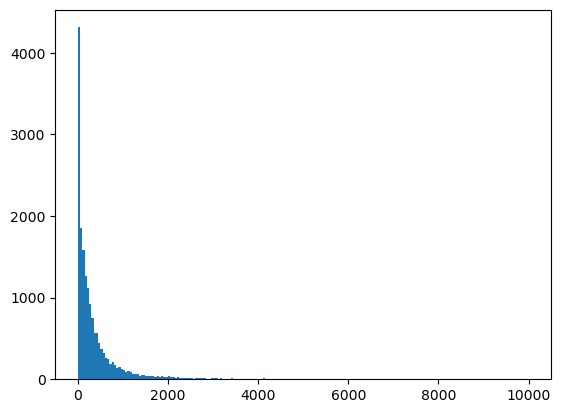

<Figure size 300x300 with 0 Axes>

In [15]:
#histograma para visualizar a frequência dos valores de desvio padrão
plt.hist(data_hugo_t.describe().loc["std",:],bins=200,range=(0,10000))
plt.figure(figsize=(3, 3))
plt.show()

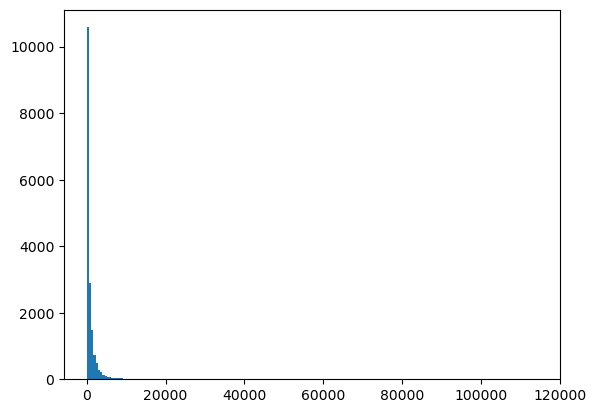

In [16]:
#histograma para visualizar a frequência dos valores da média
plt.hist(data_hugo_t.describe().loc["mean",:],bins=200)
plt.show()

In [17]:
#top 5 de genes com maior valor de média de expressão
top_5_genes=data_hugo.mean(axis=1).sort_values(ascending=False).head(5)
print(top_5_genes)

Hugo_Symbol
CEACAM5    114355.438976
ACTB       114217.067097
EEF1A1      95707.328251
ACTG1       89906.512727
TPT1        84215.384252
dtype: float64


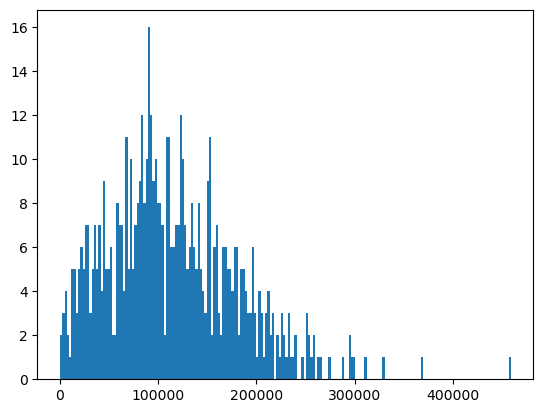

In [18]:
#histograma para visualizar a frequência dos valores de expressão génica do gene CEACAM5
plt.hist(data_hugo_t.loc[:,"CEACAM5"],bins=200)
plt.show()

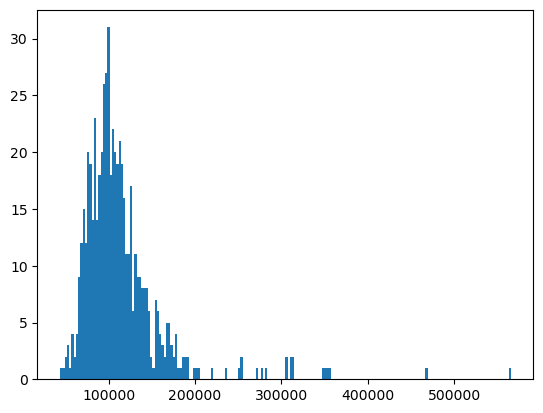

In [19]:
#histograma para visualizar a frequência dos valores de expressão génica do gene ACTB
plt.hist(data_hugo_t.loc[:,"ACTB"],bins=200)
plt.show()

#### Processamento dos dados

In [20]:
data_hugo_t_describe_t=data_hugo_t_describe.transpose()
display(data_hugo_t_describe_t)

count         mean         std          min          25%  \
Hugo_Symbol                                                             
A1BG         592.0    29.156205   31.205854     0.932293    13.428944   
POLD3        592.0   574.267238  216.513569   134.790839   439.380440   
POLD4        592.0  1748.955074  725.435579   549.877000  1289.573433   
POLDIP2      592.0  3055.650424  908.195304  1159.980000  2467.091761   
POLDIP3      592.0  1755.658299  379.956288   599.873000  1480.313704   
...            ...          ...         ...          ...          ...   
FOXD4L2      592.0     4.030623    8.025726    -0.653334     1.087829   
FOXD4L1      592.0     4.931238    5.694826    -0.124089     1.910500   
FOXD4        592.0     9.556156   10.937603    -0.346235     3.194737   
FOXE3        592.0     4.846205    8.226067    -0.207772     0.821267   
ZZZ3         592.0   680.420491  208.331454    76.459534   547.338500   

                     50%          75%          max  
Hugo_Symbol                                         
A1BG           21.515400    34.219104   353.655545  
POLD3         543.047195   653.436313  1750.551750  
POLD4        1639.019164  2050.229044  8824.770000  
POLDIP2      2949.631941  3459.185000  9990.470000  
POLDIP3      1765.635508  1980.967500  3238.590000  
...                  ...          ...          ...  
FOXD4L2         2.364958     4.703932   156.438005  
FOXD4L1         3.327415     6.000450    64.050878  
FOXD4           5.964650    12.219120    86.393100  
FOXE3           2.391004     5.592322    72.884000  
ZZZ3          670.912500   805.243305  1662.252397  

[17494 rows x 8 columns]

In [21]:
# Filtrar genes com baixa média e baixo desvio padrão

# Escolha dos limiares para média e desvio padrão
limiar_media = 10  
limiar_desvio_padrao = 5  


genes_filtrados = data_hugo_t_describe_t[(data_hugo_t_describe_t['std'] > limiar_desvio_padrao) & (data_hugo_t_describe_t['mean'] > limiar_media)].index.to_list()

# Filtrar o DataFrame com base nos genes selecionados
data_hugo = data_hugo_t[genes_filtrados]

# Calcular as estatísticas 
desc_estatisticas_genes_filtrados = data_hugo.describe()

# Exibir as estatísticas descritivas, ordenadas pelos valores de desvio padrão
display(desc_estatisticas_genes_filtrados.sort_values('std', axis=1, ascending=True))





Hugo_Symbol    MGC16142      TPI1P2       CLK2P  LOC100130691      DEPDC4  \
count        592.000000  592.000000  592.000000    592.000000  592.000000   
mean          10.318694   10.366907   12.220911     10.273218   10.457481   
std            5.034927    5.473281    5.640977      5.903997    6.059573   
min           -0.119780   -0.636130   -0.805052      0.034333    0.000000   
25%            6.881485    6.679725    8.111503      6.003196    5.975995   
50%            9.681350    9.379250   11.077550      9.239908    9.376196   
75%           13.049775   12.790976   15.112392     13.678950   13.604150   
max           31.800800   43.138012   38.689075     47.976900   43.103400   

Hugo_Symbol     FAM186B   LOC647288      TOP1P2        EID3        UCP3  ...  \
count        592.000000  592.000000  592.000000  592.000000  592.000000  ...   
mean          10.156633   11.661047   10.173261   10.218472   10.527381  ...   
std            6.454757    6.504418    6.515678    6.646029    6.778172  ...   
min           -0.244391   -0.132163    0.062384    0.322167   -0.010024  ...   
25%            5.956850    7.379025    6.149646    6.115185    6.127100  ...   
50%            9.144592   10.874900    9.206724    8.682987    9.017550  ...   
75%           12.929025   15.287419   13.140050   12.696450   12.971281  ...   
max           67.122803   40.337473   63.411500   56.034128   50.371072  ...   

Hugo_Symbol          REG1A           MUC2           ACTB         COL3A1  \
count           592.000000     592.000000     592.000000     592.000000   
mean           9734.297660   21030.513181  114217.067097   37219.222543   
std           45037.884778   47134.908516   49847.479482   50046.947863   
min              -0.296803       0.798600   43676.554490      76.147902   
25%              45.793675     718.279500   86561.892982   12110.068810   
50%             417.965743    5675.600000  103750.995750   22873.050000   
75%            3045.067500   20462.725000  125728.750000   41870.225000   
max          824037.000000  698411.000000  565767.095700  583660.000000   

Hugo_Symbol           PIGR          ADAM6        CEACAM5          OLFM4  \
count           592.000000     592.000000     592.000000     592.000000   
mean          54926.042661   34850.983316  114355.438976   38827.733250   
std           56722.936473   60646.240368   65290.381879   72881.803404   
min               0.798600      59.410900     478.970360       1.929900   
25%            7472.615000    4789.855000   68164.775000    1687.425667   
50%           38285.245860   15524.518715  106469.182400   10512.466495   
75%           84808.169775   37458.650000  153749.039700   41846.308160   
max          324843.000000  847320.659800  458395.000000  681410.000000   

Hugo_Symbol         COL1A1           IGF2  
count           592.000000     592.000000  
mean          54371.333329   20491.325915  
std           73082.792061   74759.830646  
min             888.040000      19.734000  
25%           15923.313840     234.874750  
50%           29493.014485     472.876527  
75%           60956.600000    1403.157500  
max          778070.000000  894409.000000  

[8 rows x 15162 columns]

Decidiu-se remover genes com baixa média e baixo desvio padrão para simplificar o conjunto de dados e este se concentrar em genes mais expressos, e destacar padrões biologicamente mais relevantes. Assim eliminaram-se genes com expressão mínima ou constante, que têm pouco impacto na análise. Passaram-se a ter apenas 15162 genes.

In [22]:
#transformação logarítmica

print('Valor mínimo do dataset: ',np.min(np.min(data_hugo.values)))
data_hugo_t_log = np.log2(data_hugo+1) #adiciona-se 1 porque o valor mínimo é -0.964
display(data_hugo_t_log.describe().sort_values('std', axis=1, ascending=True))


Valor mínimo do dataset:  -0.96417865


Hugo_Symbol      HNRNPL       CIAO1     GORASP2      ELAVL1      EIF2B1  \
count        592.000000  592.000000  592.000000  592.000000  592.000000   
mean          12.586163   10.921423   11.501912   10.919338    9.962611   
std            0.233223    0.248742    0.256339    0.260846    0.266877   
min           11.788563    9.660986   10.375941    9.741553    8.788275   
25%           12.430810   10.770207   11.343037   10.778104    9.793498   
50%           12.581645   10.915938   11.501118   10.932189    9.961712   
75%           12.729979   11.076057   11.679174   11.081569   10.144911   
max           13.652115   11.665305   12.294775   11.652917   10.818407   

Hugo_Symbol      GTF3C2      ZDHHC5         SF1       FBXO7       CPSF6  ...  \
count        592.000000  592.000000  592.000000  592.000000  592.000000  ...   
mean          10.556686   11.525643   12.145018   10.869241   10.758667  ...   
std            0.270021    0.270986    0.277407    0.279658    0.279806  ...   
min            8.642385   10.134401   10.940836   10.013940    9.544288  ...   
25%           10.417298   11.381306   11.973397   10.712379   10.589249  ...   
50%           10.565955   11.556884   12.157612   10.900991   10.763868  ...   
75%           10.710625   11.695141   12.317267   11.047460   10.938806  ...   
max           11.340178   12.292262   13.097630   11.973331   11.599685  ...   

Hugo_Symbol        ZG16       DEFA5       LCN15       ITLN1        REG4  \
count        592.000000  592.000000  592.000000  592.000000  592.000000   
mean           6.064826    4.954210    4.572178    7.135287    9.930278   
std            3.703996    3.775483    3.854182    3.865625    3.944444   
min           -1.142355   -0.905390   -0.618742   -0.357655    0.000000   
25%            2.933313    1.781209    1.363394    3.930732    7.448376   
50%            6.118496    4.528689    3.685317    7.751041   10.341652   
75%            9.061087    7.649124    7.066772   10.159852   12.616435   
max           15.422186   17.300442   16.349184   15.398403   18.129384   

Hugo_Symbol       REG3A       REG1A       CLCA1      DUSP27        XIST  
count        592.000000  592.000000  592.000000  592.000000  592.000000  
mean           6.308949    8.549498    8.228341    5.978925    6.452523  
std            4.140912    4.194638    4.204411    4.272355    5.242373  
min           -1.409717   -0.507999   -0.588032   -0.589105   -0.403391  
25%            2.824892    5.548240    4.892479    1.986692    1.421437  
50%            6.157789    8.710663    8.889274    5.238549    5.259750  
75%            9.233223   11.572440   11.449575   10.386826   11.837912  
max           19.077963   19.652351   19.271983   13.245795   15.560655  

[8 rows x 15162 columns]

A transformação logarítmica é usada uma vez que este dataset apresenta uma variação dos dados bastante elevada.

In [23]:
#normalização 
from sklearn import preprocessing

data_scale = preprocessing.scale(data_hugo_t_log)
data_scaled_df = pd.DataFrame(data_scale, columns=data_hugo_t_log.columns, index=data_hugo_t_log.index)


# # Exibindo estatísticas descritivas
# print('Valor mínimo depois da normalização:')
# print(data_scaled_df.min())

# print('\nValor máximo depois da normalização:')
# print(data_scaled_df.max())

# Exibindo o DataFrame
display(data_scaled_df)


Hugo_Symbol          A1BG     POLD3     POLD4   POLDIP2   POLDIP3     POLE2  \
TCGA-3L-AA1B-01  0.024649 -1.239600 -0.853881 -0.312168  0.263109 -0.676047   
TCGA-4N-A93T-01  2.811298 -1.853050  1.956391  0.292343 -2.547363 -2.162083   
TCGA-4T-AA8H-01 -0.046037 -0.596292 -0.429388  0.911456 -0.662640 -0.676710   
TCGA-5M-AAT4-01 -1.547620  0.508797  0.594102  0.707371 -0.281193  0.505423   
TCGA-5M-AAT5-01 -0.502125  0.145458 -0.143438  0.707008 -0.101461  0.010217   
...                   ...       ...       ...       ...       ...       ...   
TCGA-AG-A026-01 -0.186059 -0.560181  0.287626  0.412728 -1.100893 -0.957790   
TCGA-AG-A02G-01 -0.730617 -1.068059  0.883822  0.445010 -0.771707 -0.933323   
TCGA-AG-A02N-01 -1.461414  1.269059 -0.478129 -0.659841  0.612981  0.677436   
TCGA-AG-A02X-01 -0.390403  0.692437 -0.012180 -0.608312  0.065702  0.736165   
TCGA-AG-A032-01  0.065407  0.090807  1.186894 -0.338845  0.519507 -0.286226   

Hugo_Symbol         POLE3     POLE4      POLE     POLG2  ...     FOXD1  \
TCGA-3L-AA1B-01 -1.206292 -0.565859  0.609523  1.435395  ...  0.160454   
TCGA-4N-A93T-01 -0.870988 -0.263606  0.382572  1.785020  ... -0.803870   
TCGA-4T-AA8H-01 -1.433314  0.386023  0.881035  1.119507  ... -1.577446   
TCGA-5M-AAT4-01 -0.220850  1.111157  1.237728  1.512997  ...  0.650436   
TCGA-5M-AAT5-01 -0.615852 -0.183485  1.255908  0.883894  ... -0.870137   
...                   ...       ...       ...       ...  ...       ...   
TCGA-AG-A026-01 -1.593135 -0.808372  0.445763  0.537045  ...  0.168297   
TCGA-AG-A02G-01 -1.591691 -0.763198  0.795800  0.835920  ...  1.812681   
TCGA-AG-A02N-01  0.166797 -0.591395  1.421669  0.491184  ... -0.197869   
TCGA-AG-A02X-01  0.881014 -1.030953  1.370060 -1.147706  ... -0.427602   
TCGA-AG-A032-01 -0.182851  0.152911  0.866228 -0.222133  ... -0.844678   

Hugo_Symbol         FOXD2     FOXJ2     FOXJ1     FOXI1     FOXH1     FOXF2  \
TCGA-3L-AA1B-01 -0.064761  0.378355 -1.577755  0.655597 -0.885289  1.293581   
TCGA-4N-A93T-01  1.124853  0.225394  1.264450 -0.489537  0.984335 -1.119362   
TCGA-4T-AA8H-01 -1.066698  0.493177  1.169030  1.032957  2.179625 -0.910045   
TCGA-5M-AAT4-01  0.340086 -0.507791 -1.024978  1.957867  2.383154  0.168567   
TCGA-5M-AAT5-01 -0.966463 -0.273519  0.434694 -0.484083  0.058342 -0.236601   
...                   ...       ...       ...       ...       ...       ...   
TCGA-AG-A026-01  1.496801  0.638289 -0.752679 -0.911904  0.636038  0.354142   
TCGA-AG-A02G-01  1.561586 -0.410486  0.862452 -0.421809  0.048922 -2.058151   
TCGA-AG-A02N-01 -0.352776  2.035816 -0.919917  1.641623  0.633250 -0.733194   
TCGA-AG-A02X-01  0.655976  0.143423  0.289532 -0.911904  0.007282 -0.200265   
TCGA-AG-A032-01  1.140839  0.167803 -1.204791 -0.911904  0.379332  0.757233   

Hugo_Symbol         FRMD1     FOXF1      ZZZ3  
TCGA-3L-AA1B-01 -0.712957  0.985402  0.622109  
TCGA-4N-A93T-01  1.738553 -1.138482 -1.934606  
TCGA-4T-AA8H-01  0.857855 -1.682694 -0.579288  
TCGA-5M-AAT4-01  0.537568 -0.285137 -0.343523  
TCGA-5M-AAT5-01  0.424084  0.035922 -1.310907  
...                   ...       ...       ...  
TCGA-AG-A026-01  0.073033  1.034798 -0.560152  
TCGA-AG-A02G-01  0.524646 -1.203213 -1.860225  
TCGA-AG-A02N-01  0.727830 -1.287541  1.272084  
TCGA-AG-A02X-01 -0.339806 -0.387140  0.381361  
TCGA-AG-A032-01  1.126300  0.591035 -1.846995  

[592 rows x 15162 columns]

In [24]:
display(data_scaled_df.describe()['IGF2'])

count    5.920000e+02
mean    -2.736550e-15
std      1.000846e+00
min     -1.788153e+00
25%     -6.342438e-01
50%     -3.031748e-01
75%      2.123302e-01
max      3.276460e+00
Name: IGF2, dtype: float64

A normalização de dados é uma etapa importante para comparar amostras, remover efeitos indesejados, uniformizar a escala e facilitar a interpretação.3

### Metadados

In [25]:
meta_crc= pd.read_csv("coadread_tcga_pan_can_atlas_2018_clinical_data.tsv", sep="\t")
del meta_crc["Study ID"]

In [26]:
meta_crc.head()

Patient ID        Sample ID  Diagnosis Age  \
0  TCGA-3L-AA1B  TCGA-3L-AA1B-01           61.0   
1  TCGA-4N-A93T  TCGA-4N-A93T-01           67.0   
2  TCGA-4T-AA8H  TCGA-4T-AA8H-01           42.0   
3  TCGA-5M-AAT4  TCGA-5M-AAT4-01           74.0   
4  TCGA-5M-AAT5  TCGA-5M-AAT5-01            NaN   

  Neoplasm Disease Stage American Joint Committee on Cancer Code  \
0                                            STAGE I               
1                                         STAGE IIIB               
2                                          STAGE IIA               
3                                           STAGE IV               
4                                                NaN               

  American Joint Committee on Cancer Publication Version Type  \
0                                                7TH            
1                                                7TH            
2                                                7TH            
3                                                6TH            
4                                                NaN            

   Aneuploidy Score  Buffa Hypoxia Score                Cancer Type  \
0              19.0                  5.0  Colorectal Adenocarcinoma   
1              13.0                -15.0  Colorectal Adenocarcinoma   
2              18.0                 15.0  Colorectal Adenocarcinoma   
3              18.0                 35.0  Colorectal Adenocarcinoma   
4              10.0                 33.0  Colorectal Adenocarcinoma   

  TCGA PanCanAtlas Cancer Type Acronym  \
0                                 COAD   
1                                 COAD   
2                                 COAD   
3                                 COAD   
4                                 COAD   

                              Cancer Type Detailed  ...   9p Status  \
0                             Colon Adenocarcinoma  ...  Not Called   
1                             Colon Adenocarcinoma  ...  Not Called   
2  Mucinous Adenocarcinoma of the Colon and Rectum  ...  Not Called   
3                             Colon Adenocarcinoma  ...      Gained   
4                             Colon Adenocarcinoma  ...  Not Called   

    9q Status   Subtype  Tissue Prospective Collection Indicator  \
0  Not Called  COAD_CIN                                      Yes   
1  Not Called  COAD_CIN                                      Yes   
2  Not Called  COAD_CIN                                       No   
3  Not Called  COAD_CIN                                       No   
4  Not Called  COAD_CIN                                      NaN   

   Tissue Retrospective Collection Indicator Tissue Source Site  \
0                                         No                 3L   
1                                         No                 4N   
2                                        Yes                 4T   
3                                        Yes                 5M   
4                                        NaN                 5M   

   Tumor Disease Anatomic Site                           Tumor Type  \
0                        Colon                 Colon Adenocarcinoma   
1                        Colon                 Colon Adenocarcinoma   
2                        Colon  Colon Adenocarcinoma, Mucinous Type   
3                        Colon                 Colon Adenocarcinoma   
4                          NaN                 Colon Adenocarcinoma   

  Patient Weight Winter Hypoxia Score  
0         63.300                -12.0  
1        134.000                 -6.0  
2        107.956                 -4.0  
3            NaN                 32.0  
4            NaN                 18.0  

[5 rows x 95 columns]

In [27]:
meta_crc = meta_crc.set_index("Sample ID") # Relaciona os dataframes dos dados e dos metadados pelo Sample ID

In [28]:
meta_crc.head()

Patient ID  Diagnosis Age  \
Sample ID                                      
TCGA-3L-AA1B-01  TCGA-3L-AA1B           61.0   
TCGA-4N-A93T-01  TCGA-4N-A93T           67.0   
TCGA-4T-AA8H-01  TCGA-4T-AA8H           42.0   
TCGA-5M-AAT4-01  TCGA-5M-AAT4           74.0   
TCGA-5M-AAT5-01  TCGA-5M-AAT5            NaN   

                Neoplasm Disease Stage American Joint Committee on Cancer Code  \
Sample ID                                                                        
TCGA-3L-AA1B-01                                            STAGE I               
TCGA-4N-A93T-01                                         STAGE IIIB               
TCGA-4T-AA8H-01                                          STAGE IIA               
TCGA-5M-AAT4-01                                           STAGE IV               
TCGA-5M-AAT5-01                                                NaN               

                American Joint Committee on Cancer Publication Version Type  \
Sample ID                                                                     
TCGA-3L-AA1B-01                                                7TH            
TCGA-4N-A93T-01                                                7TH            
TCGA-4T-AA8H-01                                                7TH            
TCGA-5M-AAT4-01                                                6TH            
TCGA-5M-AAT5-01                                                NaN            

                 Aneuploidy Score  Buffa Hypoxia Score  \
Sample ID                                                
TCGA-3L-AA1B-01              19.0                  5.0   
TCGA-4N-A93T-01              13.0                -15.0   
TCGA-4T-AA8H-01              18.0                 15.0   
TCGA-5M-AAT4-01              18.0                 35.0   
TCGA-5M-AAT5-01              10.0                 33.0   

                               Cancer Type  \
Sample ID                                    
TCGA-3L-AA1B-01  Colorectal Adenocarcinoma   
TCGA-4N-A93T-01  Colorectal Adenocarcinoma   
TCGA-4T-AA8H-01  Colorectal Adenocarcinoma   
TCGA-5M-AAT4-01  Colorectal Adenocarcinoma   
TCGA-5M-AAT5-01  Colorectal Adenocarcinoma   

                TCGA PanCanAtlas Cancer Type Acronym  \
Sample ID                                              
TCGA-3L-AA1B-01                                 COAD   
TCGA-4N-A93T-01                                 COAD   
TCGA-4T-AA8H-01                                 COAD   
TCGA-5M-AAT4-01                                 COAD   
TCGA-5M-AAT5-01                                 COAD   

                                            Cancer Type Detailed  \
Sample ID                                                          
TCGA-3L-AA1B-01                             Colon Adenocarcinoma   
TCGA-4N-A93T-01                             Colon Adenocarcinoma   
TCGA-4T-AA8H-01  Mucinous Adenocarcinoma of the Colon and Rectum   
TCGA-5M-AAT4-01                             Colon Adenocarcinoma   
TCGA-5M-AAT5-01                             Colon Adenocarcinoma   

                                              Center of sequencing  ...  \
Sample ID                                                           ...   
TCGA-3L-AA1B-01                     Albert Einstein Medical Center  ...   
TCGA-4N-A93T-01  Mary Bird Perkins Cancer Center - Our Lady of ...  ...   
TCGA-4T-AA8H-01                                    Duke University  ...   
TCGA-5M-AAT4-01                            University of Sao Paulo  ...   
TCGA-5M-AAT5-01                            University of Sao Paulo  ...   

                  9p Status   9q Status   Subtype  \
Sample ID                                           
TCGA-3L-AA1B-01  Not Called  Not Called  COAD_CIN   
TCGA-4N-A93T-01  Not Called  Not Called  COAD_CIN   
TCGA-4T-AA8H-01  Not Called  Not Called  COAD_CIN   
TCGA-5M-AAT4-01      Gained  Not Called  COAD_CIN   
TCGA-5M-AAT5-01  Not Called  Not Called  COAD_CIN   

                 Tissue Prospective Collection Indicato

In [29]:
meta_crc.shape

(592, 94)

In [30]:
(meta_crc.index.sort_values() == data_hugo2.columns.sort_values()).sum()
#Nº de indivíduos presentes tanto nos dados como nos metadados

592

### Exploração dos metadados

In [31]:
display(list(meta_crc.columns))

['Patient ID',
 'Diagnosis Age',
 'Neoplasm Disease Stage American Joint Committee on Cancer Code',
 'American Joint Committee on Cancer Publication Version Type',
 'Aneuploidy Score',
 'Buffa Hypoxia Score',
 'Cancer Type',
 'TCGA PanCanAtlas Cancer Type Acronym',
 'Cancer Type Detailed',
 'Center of sequencing',
 'Last Communication Contact from Initial Pathologic Diagnosis Date',
 'Birth from Initial Pathologic Diagnosis Date',
 'Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value',
 'Disease Free (Months)',
 'Disease Free Status',
 'Months of disease-specific survival',
 'Disease-specific Survival status',
 'Ethnicity Category',
 'Form completion date',
 'Fraction Genome Altered',
 'Neoplasm Histologic Grade',
 'Neoadjuvant Therapy Type Administered Prior To Resection Text',
 'ICD-10 Classification',
 'International Classification of Diseases for Oncology, Third Edition ICD-O-3 Histology Code',
 'International Classification of Diseases for Oncology, Third Editio

In [32]:
#Analisar a quantidade de missing values presente em cada metadado.
meta_missing_dict=meta_crc.iloc[:,:].isnull().sum().to_dict()
display(meta_missing_dict)

{'Patient ID': 0,
 'Diagnosis Age': 2,
 'Neoplasm Disease Stage American Joint Committee on Cancer Code': 14,
 'American Joint Committee on Cancer Publication Version Type': 69,
 'Aneuploidy Score': 8,
 'Buffa Hypoxia Score': 227,
 'Cancer Type': 0,
 'TCGA PanCanAtlas Cancer Type Acronym': 0,
 'Cancer Type Detailed': 0,
 'Center of sequencing': 0,
 'Last Communication Contact from Initial Pathologic Diagnosis Date': 50,
 'Birth from Initial Pathologic Diagnosis Date': 4,
 'Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value': 2,
 'Disease Free (Months)': 370,
 'Disease Free Status': 370,
 'Months of disease-specific survival': 4,
 'Disease-specific Survival status': 24,
 'Ethnicity Category': 245,
 'Form completion date': 2,
 'Fraction Genome Altered': 11,
 'Neoplasm Histologic Grade': 592,
 'Neoadjuvant Therapy Type Administered Prior To Resection Text': 2,
 'ICD-10 Classification': 3,
 'International Classification of Diseases for Oncology, Third Edition ICD-O-3 Hi

In [33]:
# Criar uma lista de chaves a serem removidas
chaves_a_remover = [i for i, j in meta_missing_dict.items() if j >= len(meta_crc.index)*0.5]

# Remover as chaves do dicionário
for chave in chaves_a_remover:
    del meta_crc[chave]

In [34]:
display(meta_crc)

Patient ID  Diagnosis Age  \
Sample ID                                      
TCGA-3L-AA1B-01  TCGA-3L-AA1B           61.0   
TCGA-4N-A93T-01  TCGA-4N-A93T           67.0   
TCGA-4T-AA8H-01  TCGA-4T-AA8H           42.0   
TCGA-5M-AAT4-01  TCGA-5M-AAT4           74.0   
TCGA-5M-AAT5-01  TCGA-5M-AAT5            NaN   
...                       ...            ...   
TCGA-QL-A97D-01  TCGA-QL-A97D           84.0   
TCGA-RU-A8FL-01  TCGA-RU-A8FL           51.0   
TCGA-SS-A7HO-01  TCGA-SS-A7HO           44.0   
TCGA-T9-A92H-01  TCGA-T9-A92H           82.0   
TCGA-WS-AB45-01  TCGA-WS-AB45           52.0   

                Neoplasm Disease Stage American Joint Committee on Cancer Code  \
Sample ID                                                                        
TCGA-3L-AA1B-01                                            STAGE I               
TCGA-4N-A93T-01                                         STAGE IIIB               
TCGA-4T-AA8H-01                                          STAGE IIA               
TCGA-5M-AAT4-01                                           STAGE IV               
TCGA-5M-AAT5-01                                                NaN               
...                                                            ...               
TCGA-QL-A97D-01                                            STAGE I               
TCGA-RU-A8FL-01                                         STAGE IIIB               
TCGA-SS-A7HO-01                                          STAGE IIB               
TCGA-T9-A92H-01                                          STAGE IIA               
TCGA-WS-AB45-01                                          STAGE IIA               

                American Joint Committee on Cancer Publication Version Type  \
Sample ID                                                                     
TCGA-3L-AA1B-01                                                7TH            
TCGA-4N-A93T-01                                                7TH            
TCGA-4T-AA8H-01                                                7TH            
TCGA-5M-AAT4-01                                                6TH            
TCGA-5M-AAT5-01                                                NaN            
...                                                            ...            
TCGA-QL-A97D-01                                                7TH            
TCGA-RU-A8FL-01                                                7TH            
TCGA-SS-A7HO-01                                                7TH            
TCGA-T9-A92H-01                                                7TH            
TCGA-WS-AB45-01                                                6TH            

                 Aneuploidy Score  Buffa Hypoxia Score  \
Sample ID                                                
TCGA-3L-AA1B-01              19.0                  5.0   
TCGA-4N-A93T-01              13.0                -15.0   
TCGA-4T-AA8H-01              18.0                 15.0   
TCGA-5M-AAT4-01              18.0                 35.0   
TCGA-5M-AAT5-01              10.0                 33.0   
...                           ...                  ...   
TCGA-QL-A97D-01              21.0                 15.0   
TCGA-RU-A8FL-01              26.0                 13.0   
TCGA-SS-A7HO-01              18.0                  7.0   
TCGA-T9-A92H-01              11.0                 41.0   
TCGA-WS-AB45-01               7.0                 -3.0   

                               Cancer Type  \
Sample ID                                    
TCGA-3L-AA1B-01  Colorectal Adenocarcinoma   
TCGA-4N-A93T-01  Colorectal Adenocarcinoma   
TCGA-4T-AA8H-01  Colorectal Adenocarcinoma   
TCGA-5M-AAT4-01  Colorectal Adenocarcinoma   
TCGA-5M-AAT5-01  Colorectal Adenocarcinoma   
...                                    ...   
TCGA-QL-A97D-01  Colorectal Adenocarcinoma   
TCGA-RU-A8FL-01  Colorectal Adenocarcinoma   
TCGA-SS-A7HO-01  Colorectal Adenocarcinoma   
TCGA-T9-A92H-01  Colorectal Adenocarci

Eliminaram-se 3 colunas de metadados: 'Neoplasm Histologic Grade', 'Disease Free (Months)', 'Disease Free Status'

In [35]:
#analisar quantos indivíduos têm cancro e de que tipo

cancer_type=list(meta_crc ['Cancer Type Detailed'])

dict={}

for i in cancer_type:
    if i in dict.keys():
        dict[i]+=1
    else:
        dict[i]=1
print(dict)

{'Colon Adenocarcinoma': 377, 'Mucinous Adenocarcinoma of the Colon and Rectum': 61, 'Rectal Adenocarcinoma': 154}


Text(0, 0.5, 'Freq. absoluta')

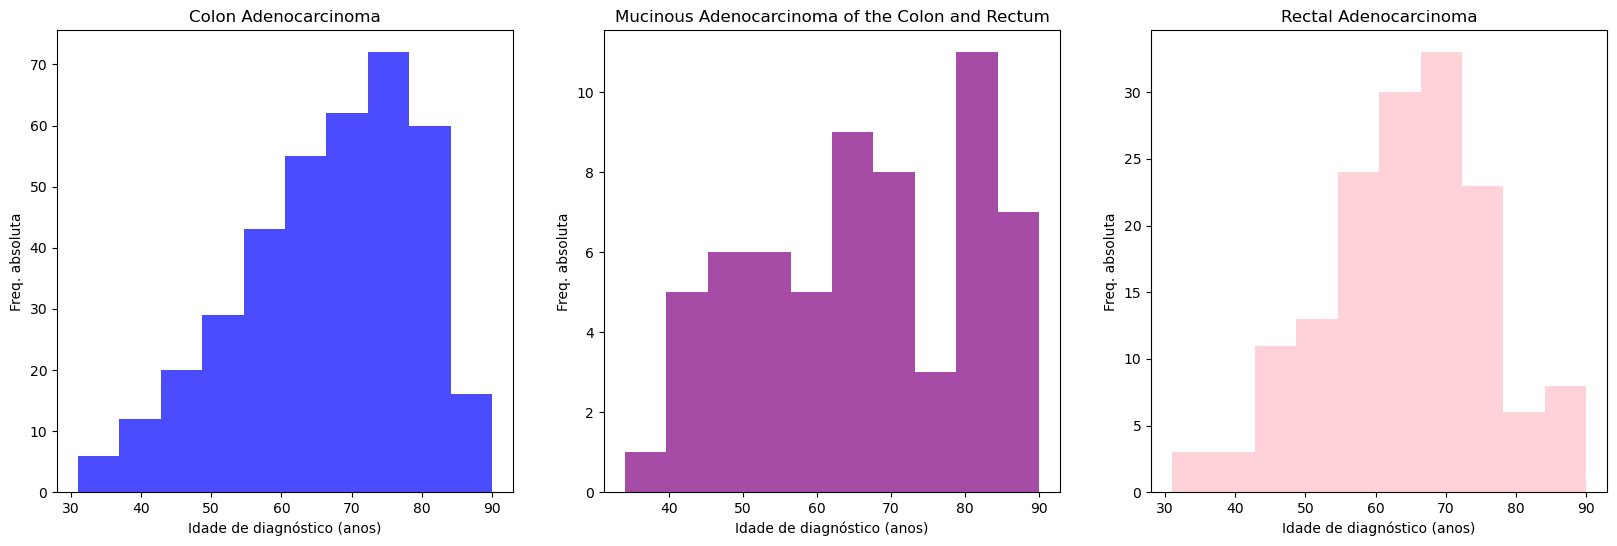

In [36]:
#analisar a influência da idade de diagnóstico no tipo de cancro

colon_adenocarcinoma = meta_crc.loc[meta_crc['Cancer Type Detailed'] == 'Colon Adenocarcinoma']
mucinous_adenocarcinoma = meta_crc.loc[meta_crc['Cancer Type Detailed'] == 'Mucinous Adenocarcinoma of the Colon and Rectum']
rectal_adenocarcinoma = meta_crc.loc[meta_crc['Cancer Type Detailed'] == 'Rectal Adenocarcinoma']

# Criar subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Plotar no primeiro subplot - Colon Adenocarcinoma
axs[0].hist(colon_adenocarcinoma['Diagnosis Age'], bins=10, color='blue', alpha=0.7)
axs[0].set_title('Colon Adenocarcinoma')
axs[0].set_xlabel('Idade de diagnóstico (anos)')
axs[0].set_ylabel('Freq. absoluta')

# Plotar no segundo subplot - Mucinous Adenocarcinoma
axs[1].hist(mucinous_adenocarcinoma['Diagnosis Age'], bins=10, color='purple', alpha=0.7)
axs[1].set_title('Mucinous Adenocarcinoma of the Colon and Rectum')
axs[1].set_xlabel('Idade de diagnóstico (anos)')
axs[1].set_ylabel('Freq. absoluta')

# Plotar no terceiro subplot - Rectal Adenocarcinoma
axs[2].hist(rectal_adenocarcinoma['Diagnosis Age'], bins=10, color='pink', alpha=0.7)
axs[2].set_title('Rectal Adenocarcinoma')
axs[2].set_xlabel('Idade de diagnóstico (anos)')
axs[2].set_ylabel('Freq. absoluta')


Pela análise dos gráficos anteriores, pode-se concluir que no caso do Colon Adenocarcinoma e do Rectal Adenocarcinoma há uma maior probabilidade de incidência à medida que aumenta a idade. No caso do Mucinous Adenocarcinoma of the Colon and Rectum esta relação não é tão linear.

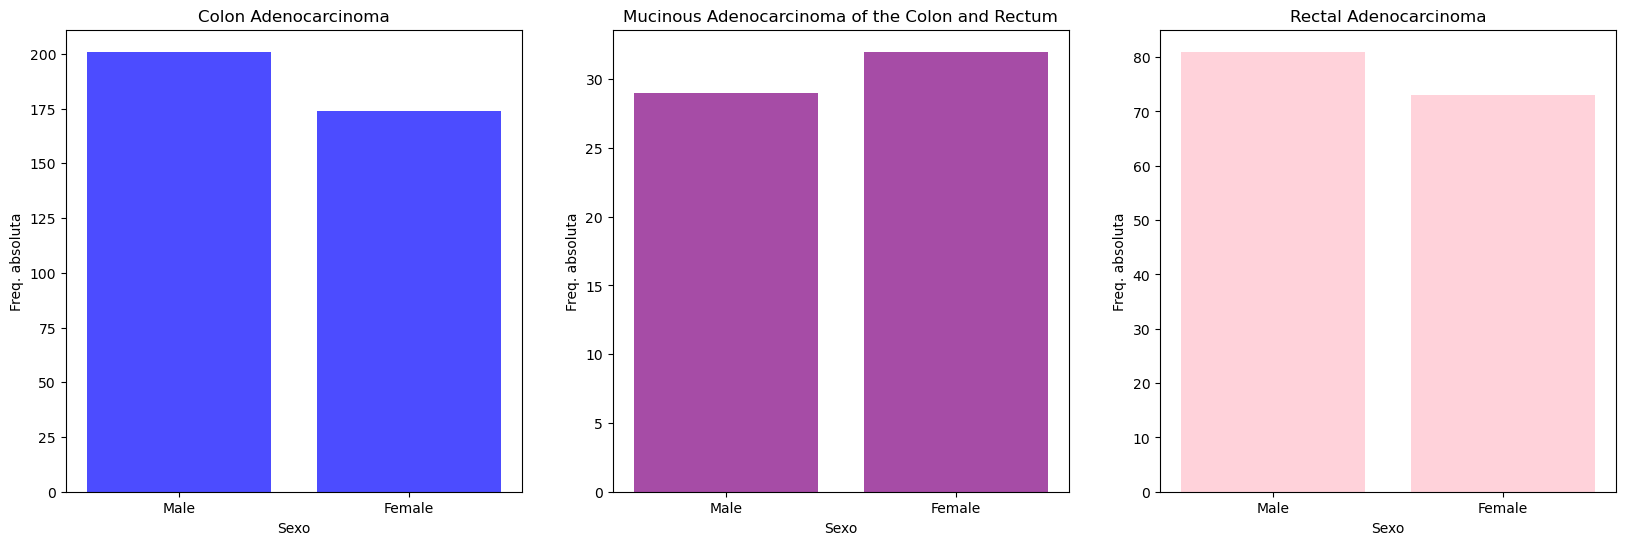

In [37]:
#analisar a influência do sexo no tipo de cancro

sex_mapping = {'Male': 0, 'Female': 1}

colon_adenocarcinoma = colon_adenocarcinoma.copy()
mucinous_adenocarcinoma = mucinous_adenocarcinoma.copy()
rectal_adenocarcinoma = rectal_adenocarcinoma.copy()

colon_adenocarcinoma['Sex_numeric'] = colon_adenocarcinoma['Sex'].map(sex_mapping)
mucinous_adenocarcinoma['Sex_numeric'] = mucinous_adenocarcinoma['Sex'].map(sex_mapping)
rectal_adenocarcinoma['Sex_numeric'] = rectal_adenocarcinoma['Sex'].map(sex_mapping)



fig, axs = plt.subplots(1, 3, figsize=(20, 6))

#Colon Adenocarcinoma
axs[0].hist(colon_adenocarcinoma['Sex_numeric'], bins=[-0.5, 0.5, 1.5], color='blue', alpha=0.7, rwidth=0.8)
axs[0].set_title('Colon Adenocarcinoma')
axs[0].set_xlabel('Sexo')
axs[0].set_ylabel('Freq. absoluta')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Male', 'Female'])

#Mucinous Adenocarcinoma
axs[1].hist(mucinous_adenocarcinoma['Sex_numeric'], bins=[-0.5, 0.5, 1.5], color='purple', alpha=0.7, rwidth=0.8)
axs[1].set_title('Mucinous Adenocarcinoma of the Colon and Rectum')
axs[1].set_xlabel('Sexo')
axs[1].set_ylabel('Freq. absoluta')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Male', 'Female'])

#Rectal Adenocarcinoma
axs[2].hist(rectal_adenocarcinoma['Sex_numeric'], bins=[-0.5, 0.5, 1.5], color='pink', alpha=0.7, rwidth=0.8)
axs[2].set_title('Rectal Adenocarcinoma')
axs[2].set_xlabel('Sexo')
axs[2].set_ylabel('Freq. absoluta')
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(['Male', 'Female'])


plt.show()


A partir dos gráficos anteriores observa-se que existe um equilíbro na incidência de cada tipo de cancro em relação ao sexo, contudo no Colon Adenocarcinoma e do Rectal Adenocarcinoma existe maior incidência no sexo masculino.

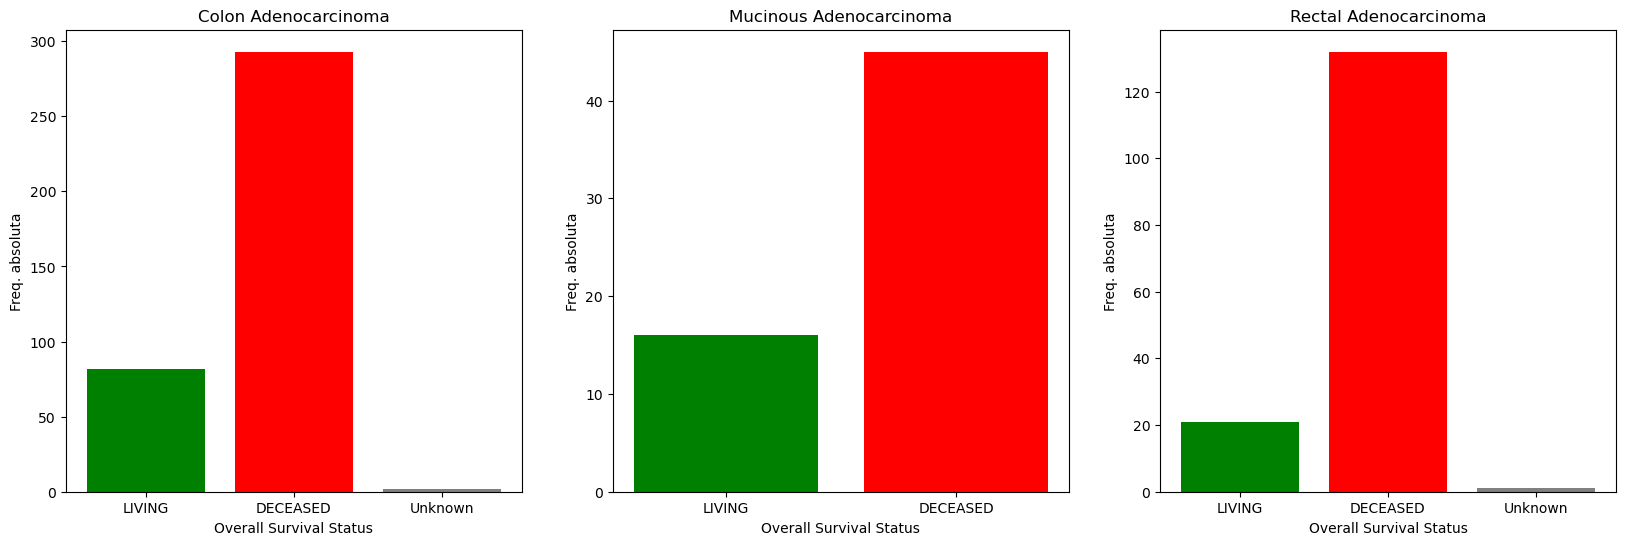

In [38]:
#analisar a sobrevivência para cada tipo de cancro 

colon_adenocarcinoma['Overall Survival Status'] = colon_adenocarcinoma['Overall Survival Status'].fillna('Unknown')
mucinous_adenocarcinoma['Overall Survival Status'] = mucinous_adenocarcinoma['Overall Survival Status'].fillna('Unknown')
rectal_adenocarcinoma['Overall Survival Status'] = rectal_adenocarcinoma['Overall Survival Status'].fillna('Unknown')

sizes_colon = list(colon_adenocarcinoma.groupby('Overall Survival Status').size())
sizes_mucinous = list(mucinous_adenocarcinoma.groupby('Overall Survival Status').size())
sizes_rectal = list(rectal_adenocarcinoma.groupby('Overall Survival Status').size())

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

axs[0].bar(colon_adenocarcinoma['Overall Survival Status'].unique(), sizes_colon, color=['green', 'red', 'gray'])
axs[0].set_title('Colon Adenocarcinoma')
axs[0].set_xlabel('Overall Survival Status')
axs[0].set_ylabel('Freq. absoluta')

axs[1].bar(mucinous_adenocarcinoma['Overall Survival Status'].unique(), sizes_mucinous, color=['green', 'red', 'gray'])
axs[1].set_title('Mucinous Adenocarcinoma')
axs[1].set_xlabel('Overall Survival Status')
axs[1].set_ylabel('Freq. absoluta')

axs[2].bar(rectal_adenocarcinoma['Overall Survival Status'].unique(), sizes_rectal, color=['green', 'red', 'gray'])
axs[2].set_title('Rectal Adenocarcinoma')
axs[2].set_xlabel('Overall Survival Status')
axs[2].set_ylabel('Freq. absoluta')

plt.show()



Observa-se a partir dos gráficos acima que o Rectal Adenocarcinoma apresenta uma maior percentagem de indivíduos que não sobreviveram. Nos outros dois tipos de cancro a percentagem é mais baixa, contudo existe sempre um maior número de indíviduos que não sobreviveram.

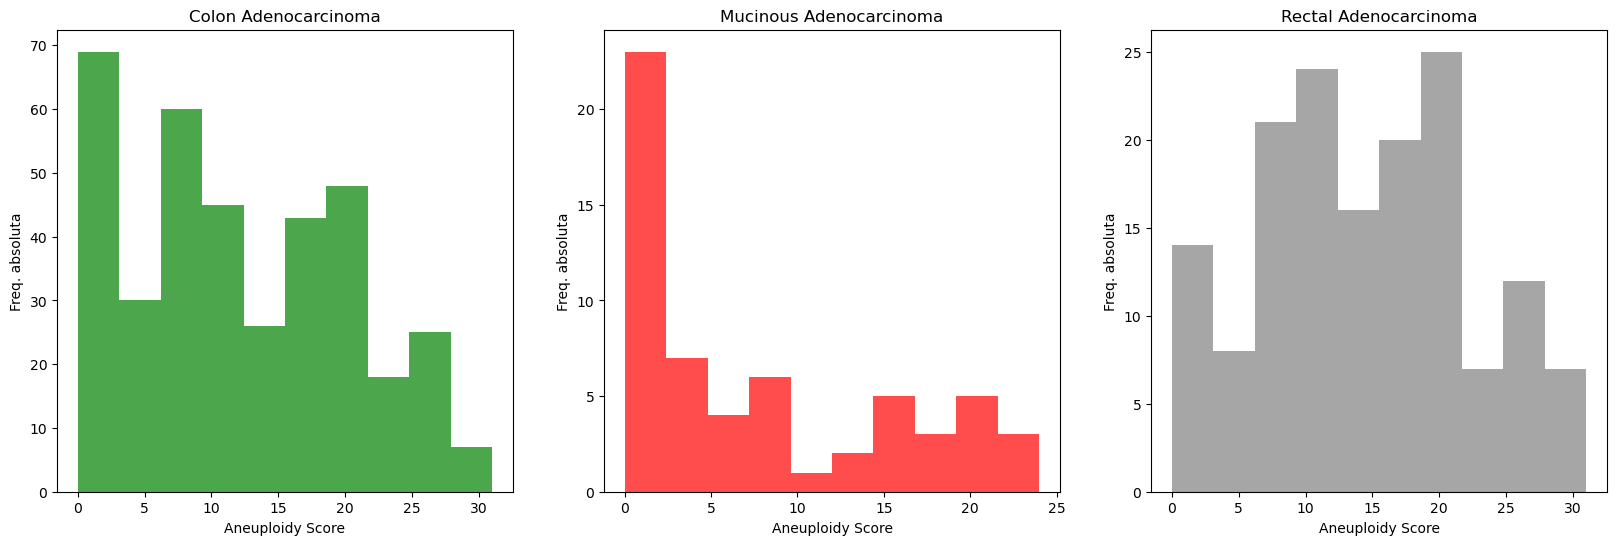

In [39]:
#analisar a sobrevivência para cada tipo de cancro

# Converter para tipo numérico
colon_adenocarcinoma['Aneuploidy Score'] = pd.to_numeric(colon_adenocarcinoma['Aneuploidy Score'], errors='coerce')
mucinous_adenocarcinoma['Aneuploidy Score'] = pd.to_numeric(mucinous_adenocarcinoma['Aneuploidy Score'], errors='coerce')
rectal_adenocarcinoma['Aneuploidy Score'] = pd.to_numeric(rectal_adenocarcinoma['Aneuploidy Score'], errors='coerce')

fig, axs = plt.subplots(1, 3, figsize=(20, 6))


axs[0].hist(colon_adenocarcinoma['Aneuploidy Score'], bins=10, color='green', alpha=0.7)
axs[0].set_title('Colon Adenocarcinoma')
axs[0].set_xlabel('Aneuploidy Score')
axs[0].set_ylabel('Freq. absoluta')

axs[1].hist(mucinous_adenocarcinoma['Aneuploidy Score'], bins=10, color='red', alpha=0.7)
axs[1].set_title('Mucinous Adenocarcinoma')
axs[1].set_xlabel('Aneuploidy Score')
axs[1].set_ylabel('Freq. absoluta')

axs[2].hist(rectal_adenocarcinoma['Aneuploidy Score'], bins=10, color='gray', alpha=0.7)
axs[2].set_title('Rectal Adenocarcinoma')
axs[2].set_xlabel('Aneuploidy Score')
axs[2].set_ylabel('Freq. absoluta')

plt.show()


Verifica-se que o Aneuploidy Score apresenta valores mais baixos no Mucionous Adenocarcinoma do que nos restantes, enquanto que nos outros tipos de cancro os valores de Aneuploidy Score apresentam uma frequência aproximadamente equilibrada em relação aos valores de Aneuploidy Score. 

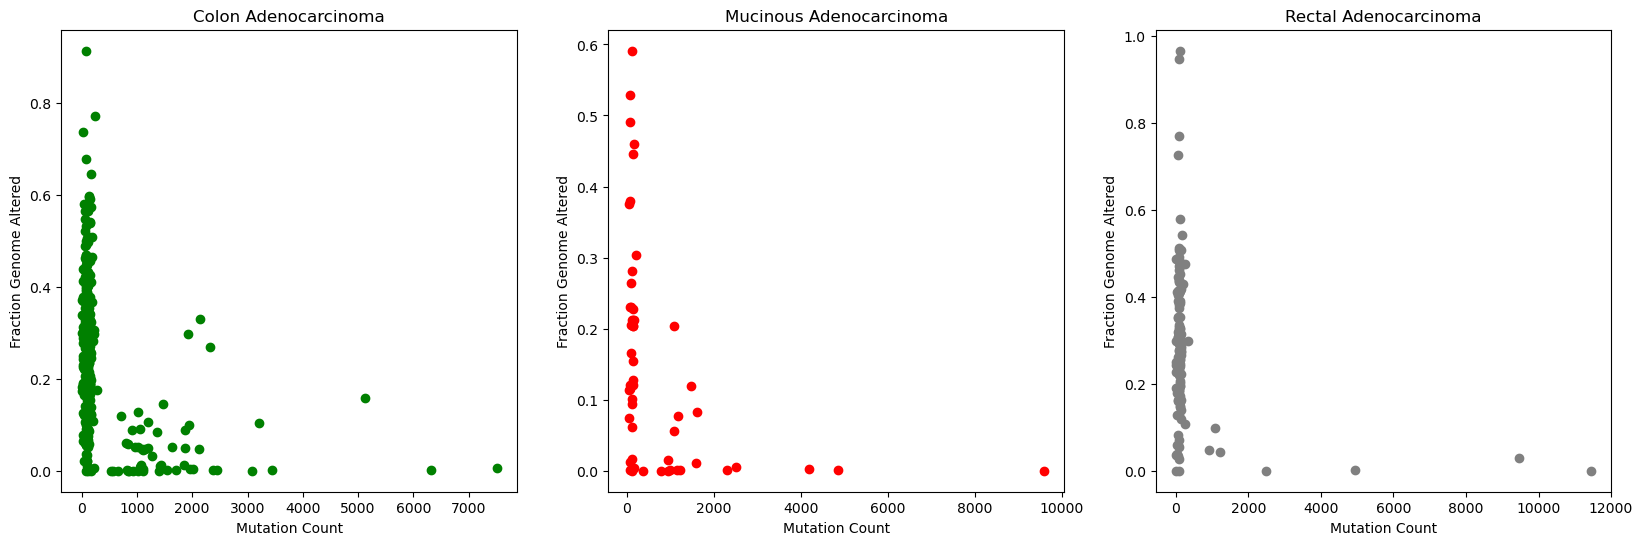

In [40]:
#mutation count vs fraction genome altered para cada tipo de cancro
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Função para plotar o gráfico
def plot_mutation_fraction(ax, df, cancer_type, color):
    ax.scatter(df['Mutation Count'], df['Fraction Genome Altered'], c=color, marker='o')
    ax.set_title(f'{cancer_type}')
    ax.set_xlabel('Mutation Count')
    ax.set_ylabel('Fraction Genome Altered')

# Plotar para cada tipo de câncer
plot_mutation_fraction(axs[0], colon_adenocarcinoma, 'Colon Adenocarcinoma', 'green')
plot_mutation_fraction(axs[1], mucinous_adenocarcinoma, 'Mucinous Adenocarcinoma', 'red')
plot_mutation_fraction(axs[2], rectal_adenocarcinoma, 'Rectal Adenocarcinoma', 'gray')

plt.show()

No caso do Colon Adenocarcinoma existem maiores valores de contagem de mutações,  enquanto que no Rectal Adenocarcinoma existe uma maior fração de genoma alterado.

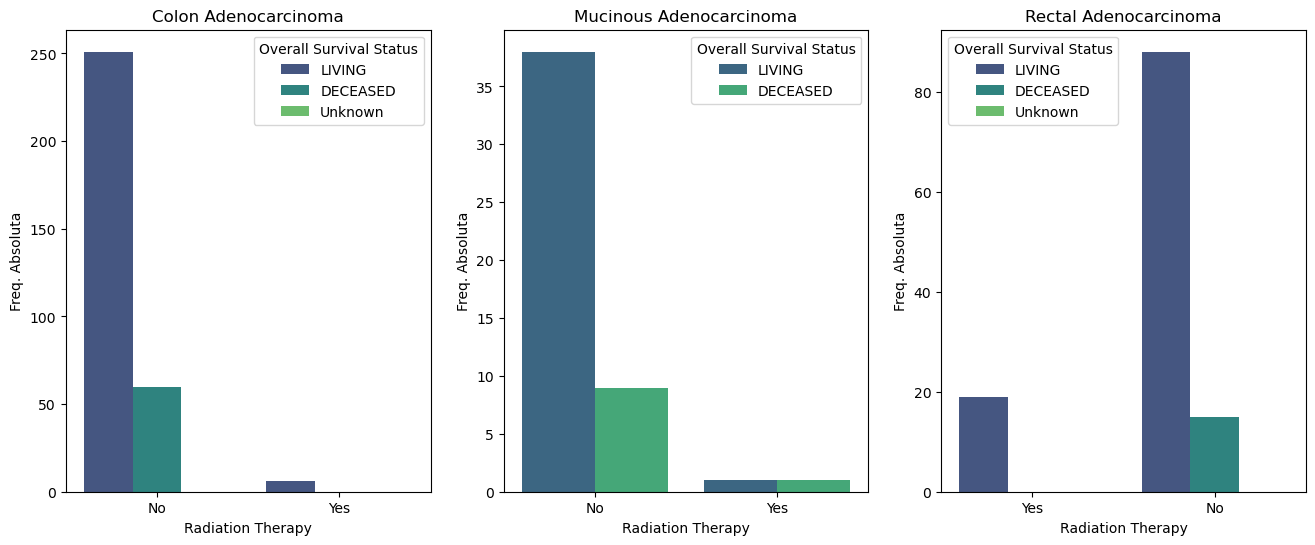

In [41]:
#relacionar radiation therapy com o overall survival status em cada tipo de cancro

# Gráfico para Colon Adenocarcinoma
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='Radiation Therapy', hue='Overall Survival Status', data=colon_adenocarcinoma, palette='viridis')
plt.title('Colon Adenocarcinoma')
plt.xlabel('Radiation Therapy')
plt.ylabel('Freq. Absoluta')

# Gráfico para Mucinous Adenocarcinoma
plt.subplot(1, 3, 2)
sns.countplot(x='Radiation Therapy', hue='Overall Survival Status', data=mucinous_adenocarcinoma, palette='viridis')
plt.title('Mucinous Adenocarcinoma')
plt.xlabel('Radiation Therapy')
plt.ylabel('Freq. Absoluta')

# Gráfico para Rectal Adenocarcinoma
plt.subplot(1, 3, 3)
sns.countplot(x='Radiation Therapy', hue='Overall Survival Status', data=rectal_adenocarcinoma, palette='viridis')
plt.title('Rectal Adenocarcinoma')
plt.xlabel('Radiation Therapy')
plt.ylabel('Freq. Absoluta')

plt.show()

A maioria dos indivíduos não realizou radioterapia. No caso do adenocarcinoma retal e do colon, quem realizou radioterapia, sobreviveu.

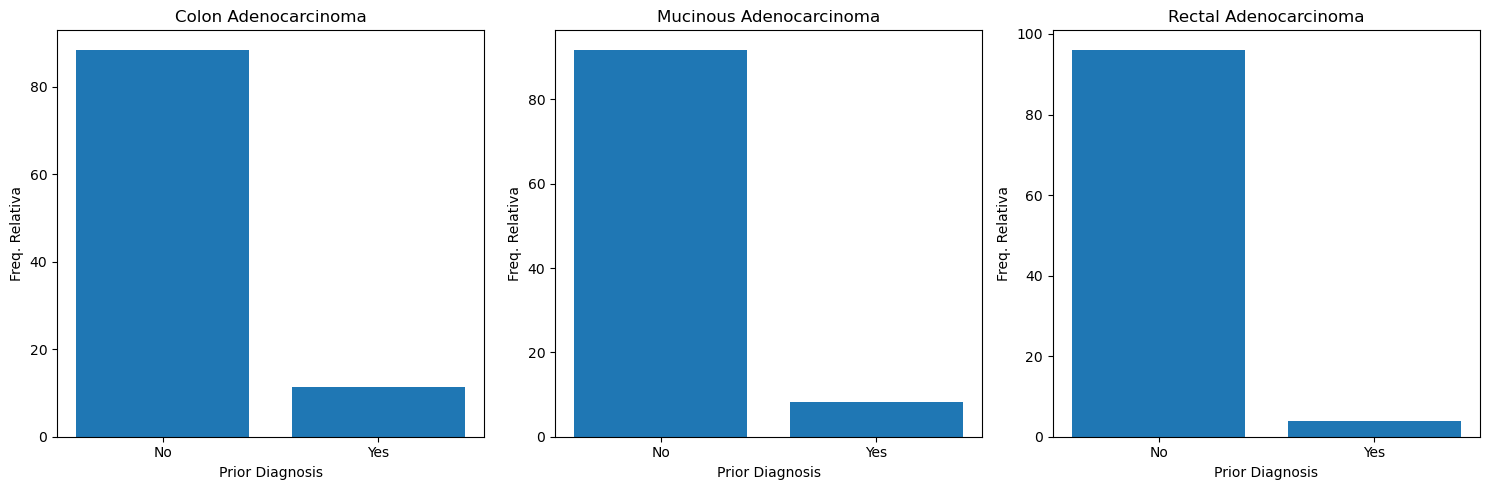

In [42]:
#relacionar se existiu diagnóstico anterior com o tipo de cancro

# Substituição de valores para 'Prior Diagnosis' em colon_adenocarcinoma
colon_adenocarcinoma['Prior Diagnosis'] = colon_adenocarcinoma['Prior Diagnosis'].replace(
    'Yes, History Of Synchronous And Or Bilateral Malignancy', 'Yes'
)

# Preenchimento de valores nulos para 'Prior Diagnosis' em mucinous_adenocarcinoma e rectal_adenocarcinoma
mucinous_adenocarcinoma['Prior Diagnosis'] = mucinous_adenocarcinoma['Prior Diagnosis'].fillna('Unknown')
rectal_adenocarcinoma['Prior Diagnosis'] = rectal_adenocarcinoma['Prior Diagnosis'].fillna('Unknown')

# Contagem de ocorrências para cada tipo de câncer
counts_co = colon_adenocarcinoma['Prior Diagnosis'].value_counts()
counts_mu = mucinous_adenocarcinoma['Prior Diagnosis'].value_counts()
counts_re = rectal_adenocarcinoma['Prior Diagnosis'].value_counts()


percent_co = counts_co / counts_co.sum() * 100
percent_mu = counts_mu / counts_mu.sum() * 100
percent_re = counts_re / counts_re.sum() * 100


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(counts_co.index, percent_co.values)
plt.xlabel('Prior Diagnosis')
plt.ylabel('Freq. Relativa')
plt.title('Colon Adenocarcinoma')

plt.subplot(1, 3, 2)
plt.bar(counts_mu.index, percent_mu.values)
plt.xlabel('Prior Diagnosis')
plt.ylabel('Freq. Relativa')
plt.title('Mucinous Adenocarcinoma')

plt.subplot(1, 3, 3)
plt.bar(counts_re.index, percent_re.values)
plt.xlabel('Prior Diagnosis')
plt.ylabel('Freq. Relativa')
plt.title('Rectal Adenocarcinoma')

plt.tight_layout()
plt.show()


Em todos os casos verifica-se que a maioria dos invidivíduos não apresentou diagnóstico anterior, no entanto no caso do adenocarcinoma do colon a percentagem de indivíduos que já apresentaram diagnóstico antes é superior em relacão aos restantes.

#### Análise dos genes com maior desvio-padrão

In [43]:
dados_maior=desc_estatisticas_genes_filtrados.sort_values('std',axis=1,ascending=False)
display(dados_maior)

Hugo_Symbol           IGF2         COL1A1          OLFM4        CEACAM5  \
count           592.000000     592.000000     592.000000     592.000000   
mean          20491.325915   54371.333329   38827.733250  114355.438976   
std           74759.830646   73082.792061   72881.803404   65290.381879   
min              19.734000     888.040000       1.929900     478.970360   
25%             234.874750   15923.313840    1687.425667   68164.775000   
50%             472.876527   29493.014485   10512.466495  106469.182400   
75%            1403.157500   60956.600000   41846.308160  153749.039700   
max          894409.000000  778070.000000  681410.000000  458395.000000   

Hugo_Symbol          ADAM6           PIGR         COL3A1           ACTB  \
count           592.000000     592.000000     592.000000     592.000000   
mean          34850.983316   54926.042661   37219.222543  114217.067097   
std           60646.240368   56722.936473   50046.947863   49847.479482   
min              59.410900       0.798600      76.147902   43676.554490   
25%            4789.855000    7472.615000   12110.068810   86561.892982   
50%           15524.518715   38285.245860   22873.050000  103750.995750   
75%           37458.650000   84808.169775   41870.225000  125728.750000   
max          847320.659800  324843.000000  583660.000000  565767.095700   

Hugo_Symbol           MUC2          REG1A  ...        UCP3        EID3  \
count           592.000000     592.000000  ...  592.000000  592.000000   
mean          21030.513181    9734.297660  ...   10.527381   10.218472   
std           47134.908516   45037.884778  ...    6.778172    6.646029   
min               0.798600      -0.296803  ...   -0.010024    0.322167   
25%             718.279500      45.793675  ...    6.127100    6.115185   
50%            5675.600000     417.965743  ...    9.017550    8.682987   
75%           20462.725000    3045.067500  ...   12.971281   12.696450   
max          698411.000000  824037.000000  ...   50.371072   56.034128   

Hugo_Symbol      TOP1P2   LOC647288     FAM186B      DEPDC4  LOC100130691  \
count        592.000000  592.000000  592.000000  592.000000    592.000000   
mean          10.173261   11.661047   10.156633   10.457481     10.273218   
std            6.515678    6.504418    6.454757    6.059573      5.903997   
min            0.062384   -0.132163   -0.244391    0.000000      0.034333   
25%            6.149646    7.379025    5.956850    5.975995      6.003196   
50%            9.206724   10.874900    9.144592    9.376196      9.239908   
75%           13.140050   15.287419   12.929025   13.604150     13.678950   
max           63.411500   40.337473   67.122803   43.103400     47.976900   

Hugo_Symbol       CLK2P      TPI1P2    MGC16142  
count        592.000000  592.000000  592.000000  
mean          12.220911   10.366907   10.318694  
std            5.640977    5.473281    5.034927  
min           -0.805052   -0.636130   -0.119780  
25%            8.111503    6.679725    6.881485  
50%           11.077550    9.379250    9.681350  
75%           15.112392   12.790976   13.049775  
max           38.689075   43.138012   31.800800  

[8 rows x 15162 columns]

In [44]:
#Iremos apenas ficar com as colunas dos metadados que se consideraram relevantes para o estudo

meta_parte = meta_crc.loc[:, ['Cancer Type Detailed', 'Aneuploidy Score', 'Mutation Count', 'Fraction Genome Altered', 'Diagnosis Age', 'Overall Survival Status']]
display(meta_parte)

Cancer Type Detailed  \
Sample ID                                                          
TCGA-3L-AA1B-01                             Colon Adenocarcinoma   
TCGA-4N-A93T-01                             Colon Adenocarcinoma   
TCGA-4T-AA8H-01  Mucinous Adenocarcinoma of the Colon and Rectum   
TCGA-5M-AAT4-01                             Colon Adenocarcinoma   
TCGA-5M-AAT5-01                             Colon Adenocarcinoma   
...                                                          ...   
TCGA-QL-A97D-01                             Colon Adenocarcinoma   
TCGA-RU-A8FL-01                             Colon Adenocarcinoma   
TCGA-SS-A7HO-01                             Colon Adenocarcinoma   
TCGA-T9-A92H-01                             Colon Adenocarcinoma   
TCGA-WS-AB45-01  Mucinous Adenocarcinoma of the Colon and Rectum   

                 Aneuploidy Score  Mutation Count  Fraction Genome Altered  \
Sample ID                                                                    
TCGA-3L-AA1B-01              19.0           120.0                   0.1127   
TCGA-4N-A93T-01              13.0            87.0                   0.3130   
TCGA-4T-AA8H-01              18.0           121.0                   0.2816   
TCGA-5M-AAT4-01              18.0           176.0                   0.4095   
TCGA-5M-AAT5-01              10.0            79.0                   0.3435   
...                           ...             ...                      ...   
TCGA-QL-A97D-01              21.0           212.0                   0.2828   
TCGA-RU-A8FL-01              26.0           126.0                   0.2344   
TCGA-SS-A7HO-01              18.0           145.0                   0.3774   
TCGA-T9-A92H-01              11.0           160.0                   0.1742   
TCGA-WS-AB45-01               7.0          2524.0                   0.0053   

                 Diagnosis Age Overall Survival Status  
Sample ID                                               
TCGA-3L-AA1B-01           61.0                  LIVING  
TCGA-4N-A93T-01           67.0                  LIVING  
TCGA-4T-AA8H-01           42.0                  LIVING  
TCGA-5M-AAT4-01           74.0                DECEASED  
TCGA-5M-AAT5-01            NaN                     NaN  
...                        ...                     ...  
TCGA-QL-A97D-01           84.0                  LIVING  
TCGA-RU-A8FL-01           51.0                  LIVING  
TCGA-SS-A7HO-01           44.0                  LIVING  
TCGA-T9-A92H-01           82.0                  LIVING  
TCGA-WS-AB45-01           52.0                  LIVING  

[592 rows x 6 columns]

In [45]:
#elimnar amostras com missing values
meta_parte= meta_parte.dropna()
display(meta_parte)

Cancer Type Detailed  \
Sample ID                                                          
TCGA-3L-AA1B-01                             Colon Adenocarcinoma   
TCGA-4N-A93T-01                             Colon Adenocarcinoma   
TCGA-4T-AA8H-01  Mucinous Adenocarcinoma of the Colon and Rectum   
TCGA-5M-AAT4-01                             Colon Adenocarcinoma   
TCGA-5M-AAT6-01                             Colon Adenocarcinoma   
...                                                          ...   
TCGA-QL-A97D-01                             Colon Adenocarcinoma   
TCGA-RU-A8FL-01                             Colon Adenocarcinoma   
TCGA-SS-A7HO-01                             Colon Adenocarcinoma   
TCGA-T9-A92H-01                             Colon Adenocarcinoma   
TCGA-WS-AB45-01  Mucinous Adenocarcinoma of the Colon and Rectum   

                 Aneuploidy Score  Mutation Count  Fraction Genome Altered  \
Sample ID                                                                    
TCGA-3L-AA1B-01              19.0           120.0                   0.1127   
TCGA-4N-A93T-01              13.0            87.0                   0.3130   
TCGA-4T-AA8H-01              18.0           121.0                   0.2816   
TCGA-5M-AAT4-01              18.0           176.0                   0.4095   
TCGA-5M-AAT6-01               3.0          1864.0                   0.0500   
...                           ...             ...                      ...   
TCGA-QL-A97D-01              21.0           212.0                   0.2828   
TCGA-RU-A8FL-01              26.0           126.0                   0.2344   
TCGA-SS-A7HO-01              18.0           145.0                   0.3774   
TCGA-T9-A92H-01              11.0           160.0                   0.1742   
TCGA-WS-AB45-01               7.0          2524.0                   0.0053   

                 Diagnosis Age Overall Survival Status  
Sample ID                                               
TCGA-3L-AA1B-01           61.0                  LIVING  
TCGA-4N-A93T-01           67.0                  LIVING  
TCGA-4T-AA8H-01           42.0                  LIVING  
TCGA-5M-AAT4-01           74.0                DECEASED  
TCGA-5M-AAT6-01           40.0                DECEASED  
...                        ...                     ...  
TCGA-QL-A97D-01           84.0                  LIVING  
TCGA-RU-A8FL-01           51.0                  LIVING  
TCGA-SS-A7HO-01           44.0                  LIVING  
TCGA-T9-A92H-01           82.0                  LIVING  
TCGA-WS-AB45-01           52.0                  LIVING  

[510 rows x 6 columns]

Foram eliminadas 82 amostras.

In [46]:
#top 10 dos genes com maior desvio-padrão

top_10_genes=data_scaled_df.loc[:,dados_maior.columns[0:10].tolist()]
display(top_10_genes)


Hugo_Symbol          IGF2    COL1A1     OLFM4   CEACAM5     ADAM6      PIGR  \
TCGA-3L-AA1B-01 -0.182036 -0.561807  1.057370 -0.096368  0.839487  0.285292   
TCGA-4N-A93T-01 -0.787401 -1.936409  0.133906  0.645521  0.587236  1.022721   
TCGA-4T-AA8H-01 -0.616695 -1.797965 -0.142312  0.567462  0.293705  0.739440   
TCGA-5M-AAT4-01 -0.586102 -0.631586 -1.422152  0.433589 -0.931651  0.630538   
TCGA-5M-AAT5-01  2.382399 -0.846107  0.740934  0.063274 -0.271300  0.702210   
...                   ...       ...       ...       ...       ...       ...   
TCGA-AG-A026-01 -0.628171 -0.602255  0.530014  0.949146 -0.841371 -2.185320   
TCGA-AG-A02G-01  0.244591 -1.609275  0.548949 -1.304259 -0.685945 -0.766585   
TCGA-AG-A02N-01  0.082219 -1.618913  0.141199  0.177917 -0.226424  0.455800   
TCGA-AG-A02X-01 -1.177151 -1.084130 -0.464792  1.185672 -0.309386  0.733295   
TCGA-AG-A032-01 -0.022716  0.099726 -0.160752  1.499738  0.071819 -0.176577   

Hugo_Symbol        COL3A1      ACTB      MUC2     REG1A  
TCGA-3L-AA1B-01 -0.290199 -0.697798  0.610305 -0.034436  
TCGA-4N-A93T-01 -1.763884 -0.052846 -0.013904 -0.006002  
TCGA-4T-AA8H-01 -1.719284  0.241815  0.679652 -1.062934  
TCGA-5M-AAT4-01 -0.818276 -0.903388 -0.119474 -1.916727  
TCGA-5M-AAT5-01 -1.033402  0.144001  0.333799  0.699217  
...                   ...       ...       ...       ...  
TCGA-AG-A026-01 -0.620149  0.595877 -0.658911 -2.161130  
TCGA-AG-A02G-01 -1.925503 -1.426191 -0.614512 -1.177836  
TCGA-AG-A02N-01 -1.629273 -1.478210  0.806569  0.630049  
TCGA-AG-A02X-01 -1.231261 -0.233525  1.290955 -0.367453  
TCGA-AG-A032-01 -0.086939  0.230676  0.512039 -0.536767  

[592 rows x 10 columns]

In [47]:
#intersetar o dataframe dos metadados com as colunas selecionadas com  o dataframe dos dados dos top 10 genes
data_meta = top_10_genes.join(meta_parte)
display(data_meta)

IGF2    COL1A1     OLFM4   CEACAM5     ADAM6      PIGR  \
TCGA-3L-AA1B-01 -0.182036 -0.561807  1.057370 -0.096368  0.839487  0.285292   
TCGA-4N-A93T-01 -0.787401 -1.936409  0.133906  0.645521  0.587236  1.022721   
TCGA-4T-AA8H-01 -0.616695 -1.797965 -0.142312  0.567462  0.293705  0.739440   
TCGA-5M-AAT4-01 -0.586102 -0.631586 -1.422152  0.433589 -0.931651  0.630538   
TCGA-5M-AAT5-01  2.382399 -0.846107  0.740934  0.063274 -0.271300  0.702210   
...                   ...       ...       ...       ...       ...       ...   
TCGA-AG-A026-01 -0.628171 -0.602255  0.530014  0.949146 -0.841371 -2.185320   
TCGA-AG-A02G-01  0.244591 -1.609275  0.548949 -1.304259 -0.685945 -0.766585   
TCGA-AG-A02N-01  0.082219 -1.618913  0.141199  0.177917 -0.226424  0.455800   
TCGA-AG-A02X-01 -1.177151 -1.084130 -0.464792  1.185672 -0.309386  0.733295   
TCGA-AG-A032-01 -0.022716  0.099726 -0.160752  1.499738  0.071819 -0.176577   

                   COL3A1      ACTB      MUC2     REG1A  \
TCGA-3L-AA1B-01 -0.290199 -0.697798  0.610305 -0.034436   
TCGA-4N-A93T-01 -1.763884 -0.052846 -0.013904 -0.006002   
TCGA-4T-AA8H-01 -1.719284  0.241815  0.679652 -1.062934   
TCGA-5M-AAT4-01 -0.818276 -0.903388 -0.119474 -1.916727   
TCGA-5M-AAT5-01 -1.033402  0.144001  0.333799  0.699217   
...                   ...       ...       ...       ...   
TCGA-AG-A026-01 -0.620149  0.595877 -0.658911 -2.161130   
TCGA-AG-A02G-01 -1.925503 -1.426191 -0.614512 -1.177836   
TCGA-AG-A02N-01 -1.629273 -1.478210  0.806569  0.630049   
TCGA-AG-A02X-01 -1.231261 -0.233525  1.290955 -0.367453   
TCGA-AG-A032-01 -0.086939  0.230676  0.512039 -0.536767   

                                            Cancer Type Detailed  \
TCGA-3L-AA1B-01                             Colon Adenocarcinoma   
TCGA-4N-A93T-01                             Colon Adenocarcinoma   
TCGA-4T-AA8H-01  Mucinous Adenocarcinoma of the Colon and Rectum   
TCGA-5M-AAT4-01                             Colon Adenocarcinoma   
TCGA-5M-AAT5-01                                              NaN   
...                                                          ...   
TCGA-AG-A026-01                            Rectal Adenocarcinoma   
TCGA-AG-A02G-01                                              NaN   
TCGA-AG-A02N-01                            Rectal Adenocarcinoma   
TCGA-AG-A02X-01                            Rectal Adenocarcinoma   
TCGA-AG-A032-01                            Rectal Adenocarcinoma   

                 Aneuploidy Score  Mutation Count  Fraction Genome Altered  \
TCGA-3L-AA1B-01              19.0           120.0                   0.1127   
TCGA-4N-A93T-01              13.0            87.0                   0.3130   
TCGA-4T-AA8H-01              18.0           121.0                   0.2816   
TCGA-5M-AAT4-01              18.0           176.0                   0.4095   
TCGA-5M-AAT5-01               NaN             NaN                      NaN   
...                           ...             ...                      ...   
TCGA-AG-A026-01              19.0           202.0                   0.4292   
TCGA-AG-A02G-01               NaN             NaN                      NaN   
TCGA-AG-A02N-01               4.0          1081.0                   0.0980   
TCGA-AG-A02X-01              18.0           126.0                   0.9653   
TCGA-AG-A032-01              24.0            77.0                   0.4336   

                 Diagnosis Age Overall Survival Status  
TCGA-3L-AA1B-01           61.0                  LIVING  
TCGA-4N-A93T-01           67.0                  LIVING  
TCGA-4T-AA8H-01           42.0                  LIVING  
TCGA-5M-AAT4-01           74.0                DECEASED  
TCGA-5M-AAT5-01            NaN                     NaN  
...                        ...                     ...  
TCGA-AG-A026-01           66.0                DECEASED  
TCGA-AG-A02G-01            NaN                     NaN  
TCGA-AG-A02N-01           67.0                  LIVING  
TCGA-AG-A02X-01           77.0         

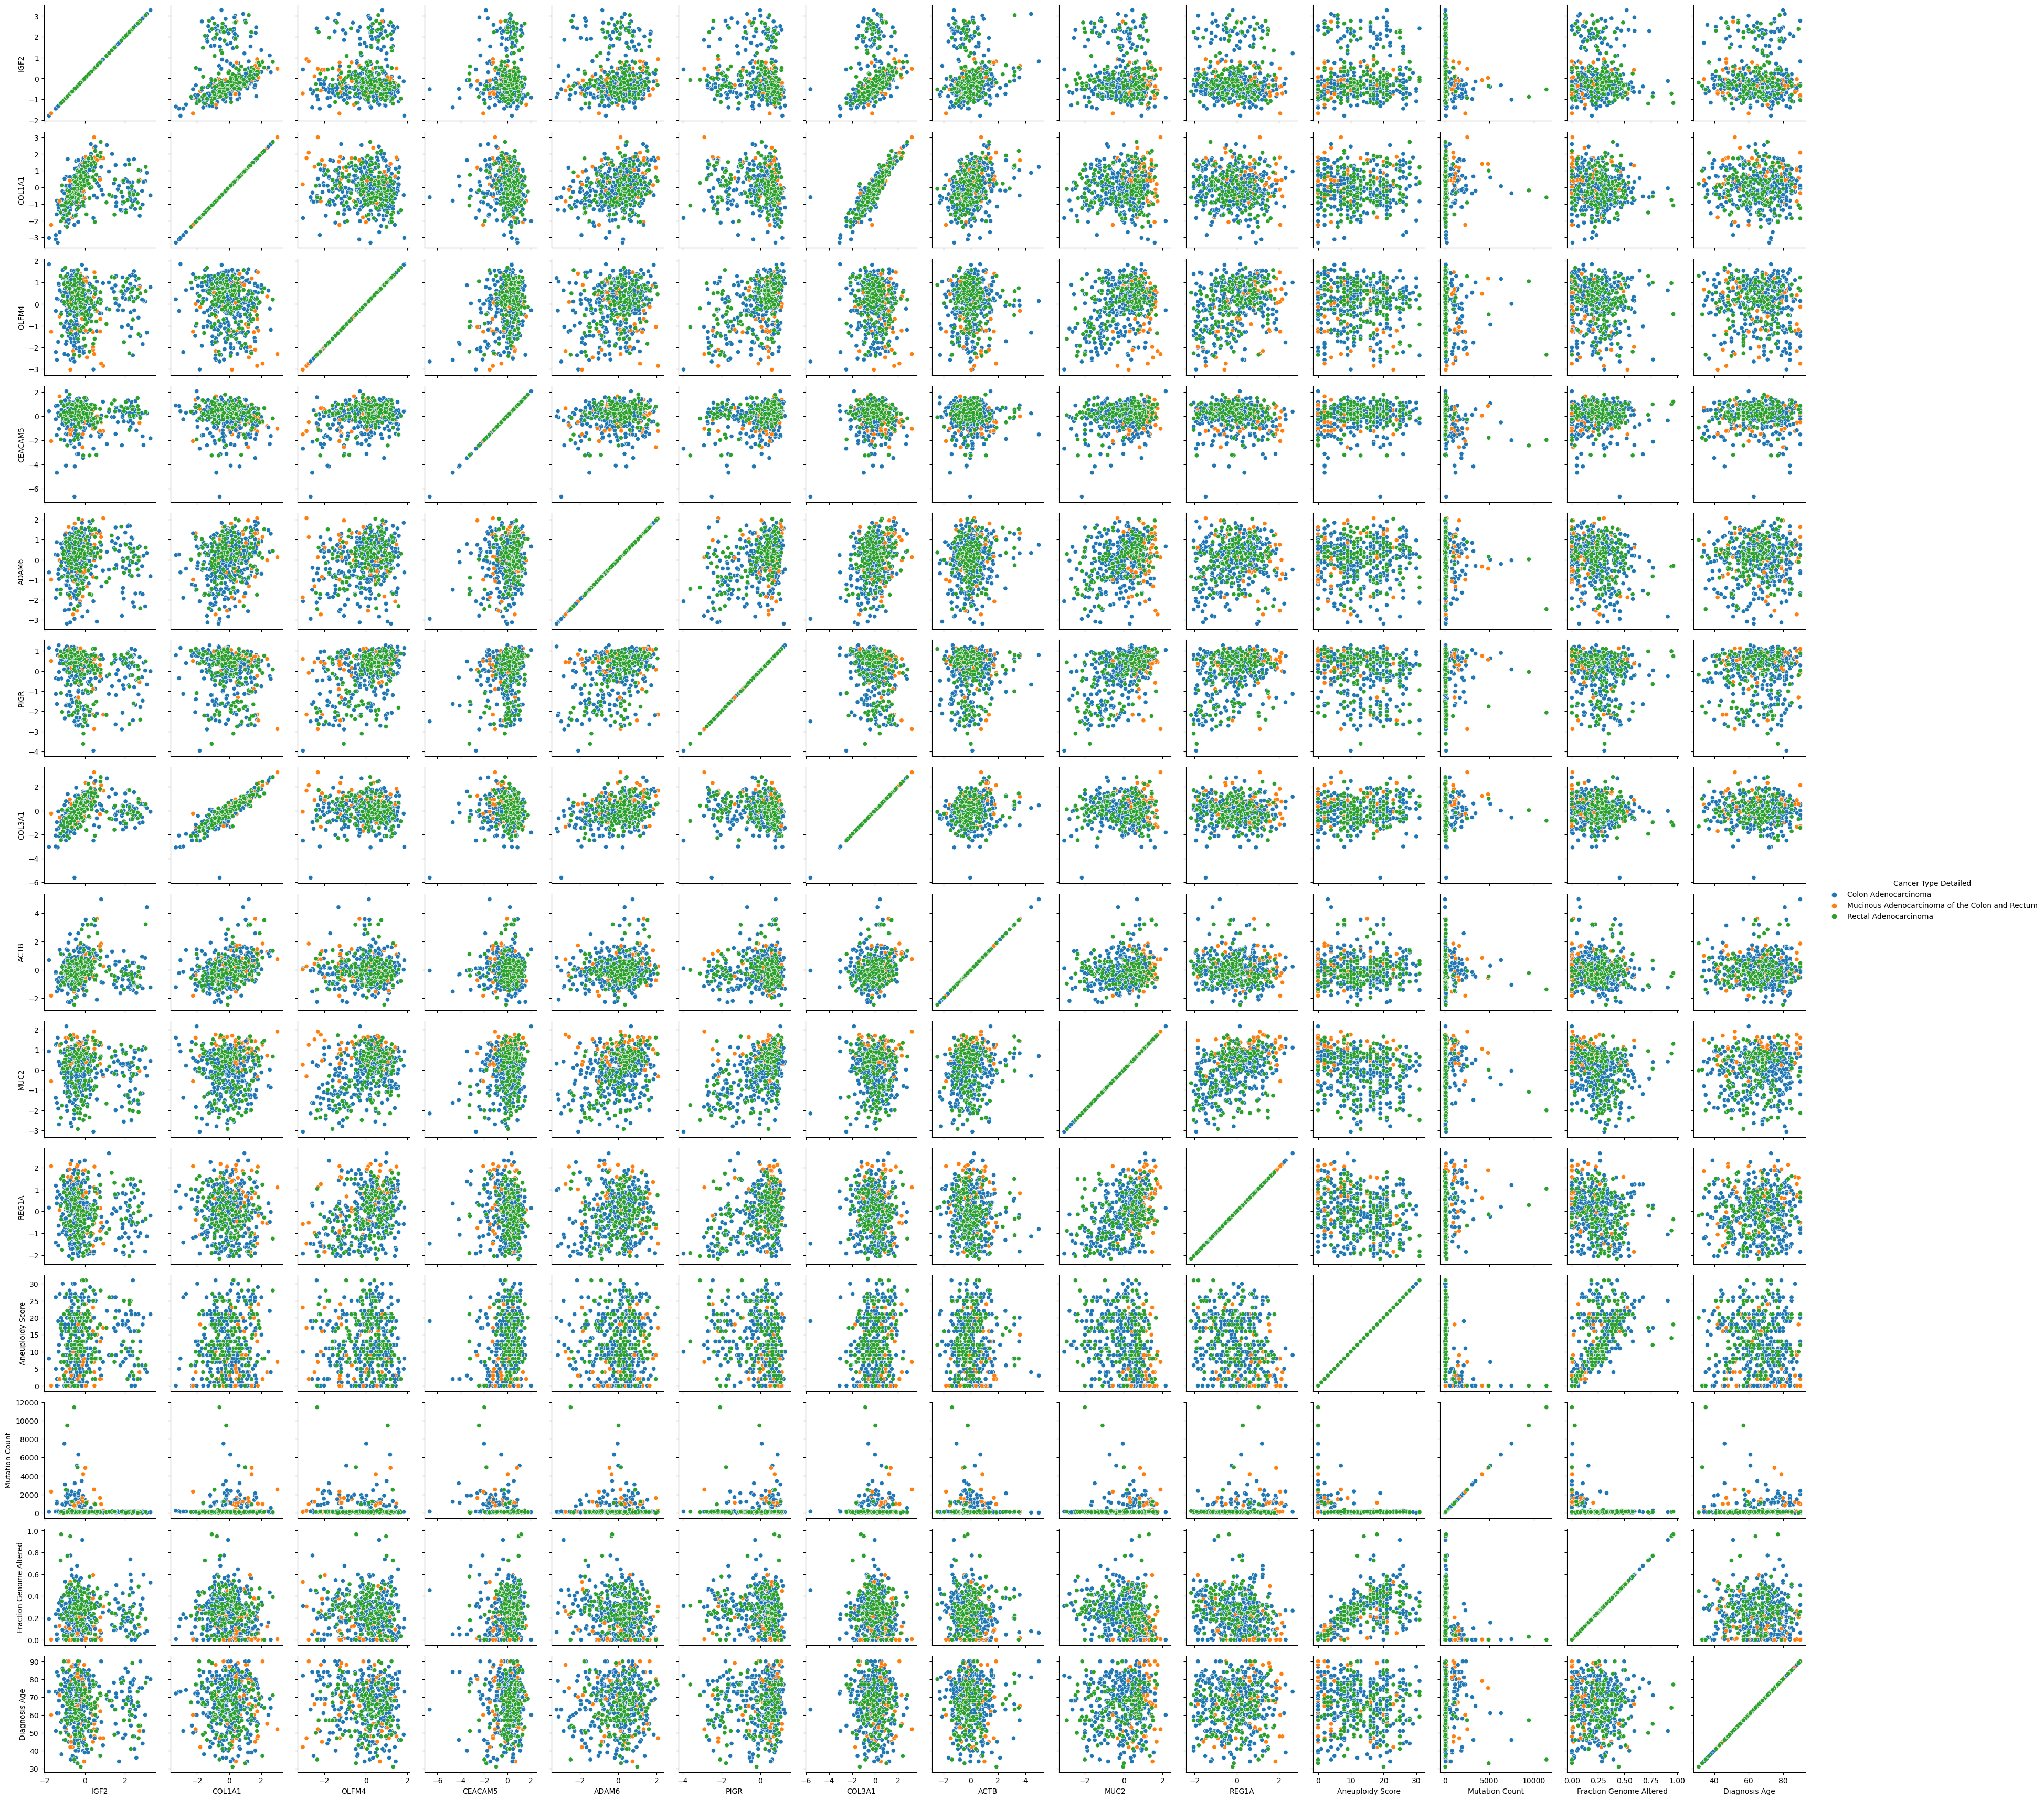

In [48]:
#Analisar a correlação

g=sns.PairGrid(data_meta, hue='Cancer Type Detailed')
g.map(sns.scatterplot)
g.add_legend()

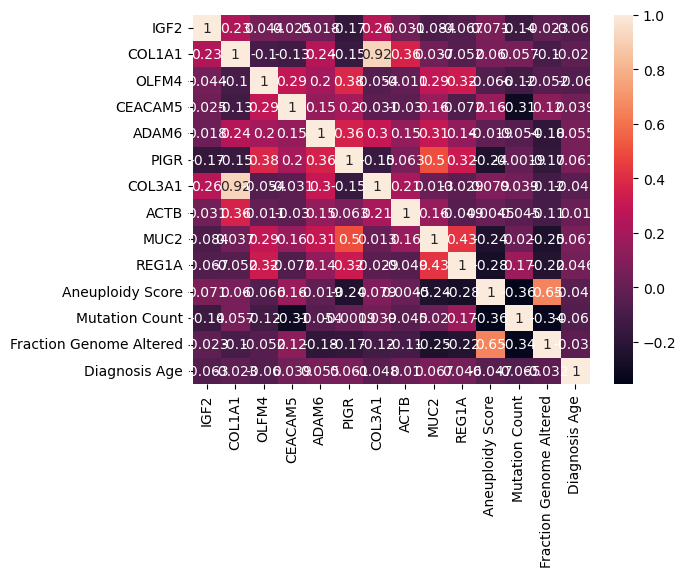

In [49]:
ax = sns.heatmap(data_meta.corr(numeric_only=True), annot=True)

Nas matrizes de correlação mantiveram-se apenas os atributos numéricos.

Tanto os gráficos como a matriz de correlação permitem verificar que os genes COL1A1 e COL3A1 apresentam um elevado valor de correlação, pelo que se pode eliminar um deles. 

In [50]:
display(data_scaled_df)

Hugo_Symbol          A1BG     POLD3     POLD4   POLDIP2   POLDIP3     POLE2  \
TCGA-3L-AA1B-01  0.024649 -1.239600 -0.853881 -0.312168  0.263109 -0.676047   
TCGA-4N-A93T-01  2.811298 -1.853050  1.956391  0.292343 -2.547363 -2.162083   
TCGA-4T-AA8H-01 -0.046037 -0.596292 -0.429388  0.911456 -0.662640 -0.676710   
TCGA-5M-AAT4-01 -1.547620  0.508797  0.594102  0.707371 -0.281193  0.505423   
TCGA-5M-AAT5-01 -0.502125  0.145458 -0.143438  0.707008 -0.101461  0.010217   
...                   ...       ...       ...       ...       ...       ...   
TCGA-AG-A026-01 -0.186059 -0.560181  0.287626  0.412728 -1.100893 -0.957790   
TCGA-AG-A02G-01 -0.730617 -1.068059  0.883822  0.445010 -0.771707 -0.933323   
TCGA-AG-A02N-01 -1.461414  1.269059 -0.478129 -0.659841  0.612981  0.677436   
TCGA-AG-A02X-01 -0.390403  0.692437 -0.012180 -0.608312  0.065702  0.736165   
TCGA-AG-A032-01  0.065407  0.090807  1.186894 -0.338845  0.519507 -0.286226   

Hugo_Symbol         POLE3     POLE4      POLE     POLG2  ...     FOXD1  \
TCGA-3L-AA1B-01 -1.206292 -0.565859  0.609523  1.435395  ...  0.160454   
TCGA-4N-A93T-01 -0.870988 -0.263606  0.382572  1.785020  ... -0.803870   
TCGA-4T-AA8H-01 -1.433314  0.386023  0.881035  1.119507  ... -1.577446   
TCGA-5M-AAT4-01 -0.220850  1.111157  1.237728  1.512997  ...  0.650436   
TCGA-5M-AAT5-01 -0.615852 -0.183485  1.255908  0.883894  ... -0.870137   
...                   ...       ...       ...       ...  ...       ...   
TCGA-AG-A026-01 -1.593135 -0.808372  0.445763  0.537045  ...  0.168297   
TCGA-AG-A02G-01 -1.591691 -0.763198  0.795800  0.835920  ...  1.812681   
TCGA-AG-A02N-01  0.166797 -0.591395  1.421669  0.491184  ... -0.197869   
TCGA-AG-A02X-01  0.881014 -1.030953  1.370060 -1.147706  ... -0.427602   
TCGA-AG-A032-01 -0.182851  0.152911  0.866228 -0.222133  ... -0.844678   

Hugo_Symbol         FOXD2     FOXJ2     FOXJ1     FOXI1     FOXH1     FOXF2  \
TCGA-3L-AA1B-01 -0.064761  0.378355 -1.577755  0.655597 -0.885289  1.293581   
TCGA-4N-A93T-01  1.124853  0.225394  1.264450 -0.489537  0.984335 -1.119362   
TCGA-4T-AA8H-01 -1.066698  0.493177  1.169030  1.032957  2.179625 -0.910045   
TCGA-5M-AAT4-01  0.340086 -0.507791 -1.024978  1.957867  2.383154  0.168567   
TCGA-5M-AAT5-01 -0.966463 -0.273519  0.434694 -0.484083  0.058342 -0.236601   
...                   ...       ...       ...       ...       ...       ...   
TCGA-AG-A026-01  1.496801  0.638289 -0.752679 -0.911904  0.636038  0.354142   
TCGA-AG-A02G-01  1.561586 -0.410486  0.862452 -0.421809  0.048922 -2.058151   
TCGA-AG-A02N-01 -0.352776  2.035816 -0.919917  1.641623  0.633250 -0.733194   
TCGA-AG-A02X-01  0.655976  0.143423  0.289532 -0.911904  0.007282 -0.200265   
TCGA-AG-A032-01  1.140839  0.167803 -1.204791 -0.911904  0.379332  0.757233   

Hugo_Symbol         FRMD1     FOXF1      ZZZ3  
TCGA-3L-AA1B-01 -0.712957  0.985402  0.622109  
TCGA-4N-A93T-01  1.738553 -1.138482 -1.934606  
TCGA-4T-AA8H-01  0.857855 -1.682694 -0.579288  
TCGA-5M-AAT4-01  0.537568 -0.285137 -0.343523  
TCGA-5M-AAT5-01  0.424084  0.035922 -1.310907  
...                   ...       ...       ...  
TCGA-AG-A026-01  0.073033  1.034798 -0.560152  
TCGA-AG-A02G-01  0.524646 -1.203213 -1.860225  
TCGA-AG-A02N-01  0.727830 -1.287541  1.272084  
TCGA-AG-A02X-01 -0.339806 -0.387140  0.381361  
TCGA-AG-A032-01  1.126300  0.591035 -1.846995  

[592 rows x 15162 columns]

In [51]:
# data_scaled_df_no_id=data_scaled_df.set_index['Hugo_Symbol']
# display(data_scaled_df_no_id)

In [52]:
#ficar com as mesmas amostras que o meta_parte (510)

meta_parte_t=meta_parte.transpose()
L=list(meta_parte_t.columns)

data_scaled_df_t=data_scaled_df.transpose()

L1=list(data_scaled_df_t.columns)

for i in L1:
    if i not in L:
        del data_scaled_df_t[i]
    
data_scaled_df=data_scaled_df_t.transpose()


display(data_scaled_df)

Hugo_Symbol          A1BG     POLD3     POLD4   POLDIP2   POLDIP3     POLE2  \
TCGA-3L-AA1B-01  0.024649 -1.239600 -0.853881 -0.312168  0.263109 -0.676047   
TCGA-4N-A93T-01  2.811298 -1.853050  1.956391  0.292343 -2.547363 -2.162083   
TCGA-4T-AA8H-01 -0.046037 -0.596292 -0.429388  0.911456 -0.662640 -0.676710   
TCGA-5M-AAT4-01 -1.547620  0.508797  0.594102  0.707371 -0.281193  0.505423   
TCGA-5M-AAT6-01  1.115970  0.013048 -0.570605  1.156797  0.160400  1.090582   
...                   ...       ...       ...       ...       ...       ...   
TCGA-AG-A020-01 -1.975643 -0.214927 -0.094522  1.052928 -1.640452  1.011378   
TCGA-AG-A026-01 -0.186059 -0.560181  0.287626  0.412728 -1.100893 -0.957790   
TCGA-AG-A02N-01 -1.461414  1.269059 -0.478129 -0.659841  0.612981  0.677436   
TCGA-AG-A02X-01 -0.390403  0.692437 -0.012180 -0.608312  0.065702  0.736165   
TCGA-AG-A032-01  0.065407  0.090807  1.186894 -0.338845  0.519507 -0.286226   

Hugo_Symbol         POLE3     POLE4      POLE     POLG2  ...     FOXD1  \
TCGA-3L-AA1B-01 -1.206292 -0.565859  0.609523  1.435395  ...  0.160454   
TCGA-4N-A93T-01 -0.870988 -0.263606  0.382572  1.785020  ... -0.803870   
TCGA-4T-AA8H-01 -1.433314  0.386023  0.881035  1.119507  ... -1.577446   
TCGA-5M-AAT4-01 -0.220850  1.111157  1.237728  1.512997  ...  0.650436   
TCGA-5M-AAT6-01  0.196896 -0.009911  0.763806  0.682081  ...  0.339766   
...                   ...       ...       ...       ...  ...       ...   
TCGA-AG-A020-01  1.450962 -0.089921  1.496547  0.377094  ... -0.445979   
TCGA-AG-A026-01 -1.593135 -0.808372  0.445763  0.537045  ...  0.168297   
TCGA-AG-A02N-01  0.166797 -0.591395  1.421669  0.491184  ... -0.197869   
TCGA-AG-A02X-01  0.881014 -1.030953  1.370060 -1.147706  ... -0.427602   
TCGA-AG-A032-01 -0.182851  0.152911  0.866228 -0.222133  ... -0.844678   

Hugo_Symbol         FOXD2     FOXJ2     FOXJ1     FOXI1     FOXH1     FOXF2  \
TCGA-3L-AA1B-01 -0.064761  0.378355 -1.577755  0.655597 -0.885289  1.293581   
TCGA-4N-A93T-01  1.124853  0.225394  1.264450 -0.489537  0.984335 -1.119362   
TCGA-4T-AA8H-01 -1.066698  0.493177  1.169030  1.032957  2.179625 -0.910045   
TCGA-5M-AAT4-01  0.340086 -0.507791 -1.024978  1.957867  2.383154  0.168567   
TCGA-5M-AAT6-01 -2.570414  0.512966  1.380665  2.808544  3.269095 -1.467687   
...                   ...       ...       ...       ...       ...       ...   
TCGA-AG-A020-01  0.186295  0.811159  0.705931 -0.009774  0.212320 -1.299129   
TCGA-AG-A026-01  1.496801  0.638289 -0.752679 -0.911904  0.636038  0.354142   
TCGA-AG-A02N-01 -0.352776  2.035816 -0.919917  1.641623  0.633250 -0.733194   
TCGA-AG-A02X-01  0.655976  0.143423  0.289532 -0.911904  0.007282 -0.200265   
TCGA-AG-A032-01  1.140839  0.167803 -1.204791 -0.911904  0.379332  0.757233   

Hugo_Symbol         FRMD1     FOXF1      ZZZ3  
TCGA-3L-AA1B-01 -0.712957  0.985402  0.622109  
TCGA-4N-A93T-01  1.738553 -1.138482 -1.934606  
TCGA-4T-AA8H-01  0.857855 -1.682694 -0.579288  
TCGA-5M-AAT4-01  0.537568 -0.285137 -0.343523  
TCGA-5M-AAT6-01 -2.522545 -2.001512  0.307842  
...                   ...       ...       ...  
TCGA-AG-A020-01  0.237864 -1.696855  0.798097  
TCGA-AG-A026-01  0.073033  1.034798 -0.560152  
TCGA-AG-A02N-01  0.727830 -1.287541  1.272084  
TCGA-AG-A02X-01 -0.339806 -0.387140  0.381361  
TCGA-AG-A032-01  1.126300  0.591035 -1.846995  

[510 rows x 15162 columns]

#### Método ANOVA 

Objetivo: avaliar a variação nas médias de diferentes genes no dataset (seleciona genes diferencialmente expressos)

O p-value para a rejeição da hipótese nula foi de 0.01.

In [ ]:
# Filtrar genes com o p-value mais baixo the (10% of genes with the lowes value)
select = SelectPercentile(f_classif, percentile=10)

output= meta_parte.values[:,0] #todas as linhas e apenas 2ª coluna (sample id)


select.fit_transform(data_scaled_df, output) #responsável pelo treino do modelo
genes_selec = np.where(select.pvalues_ <0.01) #selecionar só as colunas com os genes diferencialmente expressos

print(data_scaled_df.columns[genes_selec])

print(genes_selec[0])

Selecionaram-se apenas 1572 genes.

In [54]:
data_scaled_df= data_scaled_df.iloc[:,genes_selec[0]]
display(data_scaled_df)

Hugo_Symbol         POLE4      POLE    POLR1E       PNN   POLR2J4    POU2F1  \
TCGA-3L-AA1B-01 -0.565859  0.609523  0.277041  0.744750  2.223939 -0.846533   
TCGA-4N-A93T-01 -0.263606  0.382572 -1.123349  0.948611  3.240163  0.099209   
TCGA-4T-AA8H-01  0.386023  0.881035 -0.658431  0.661323  1.120020  0.342656   
TCGA-5M-AAT4-01  1.111157  1.237728  2.007117  1.045460  1.567286  0.510053   
TCGA-5M-AAT6-01 -0.009911  0.763806  1.297459  0.787248  0.241110 -0.385123   
...                   ...       ...       ...       ...       ...       ...   
TCGA-AG-A020-01 -0.089921  1.496547  1.032069  0.790541 -0.857043  0.501163   
TCGA-AG-A026-01 -0.808372  0.445763 -1.536902  0.084830 -0.397733 -0.213743   
TCGA-AG-A02N-01 -0.591395  1.421669  0.015783  0.609281 -1.644223  0.199546   
TCGA-AG-A02X-01 -1.030953  1.370060  0.015092 -0.018753 -0.151561  0.648990   
TCGA-AG-A032-01  0.152911  0.866228 -0.859055 -0.226074  0.484064 -1.228920   

Hugo_Symbol       PPAPDC3   PLEKHA9   PLEKHB2   PLEKHF2  ...  FLJ45244  \
TCGA-3L-AA1B-01  0.406434  0.871424 -0.186812 -0.489103  ...  1.330013   
TCGA-4N-A93T-01 -1.082687 -1.323116 -0.542172 -0.430874  ...  1.144536   
TCGA-4T-AA8H-01 -1.945768 -0.456658 -0.056610  0.130252  ...  0.892473   
TCGA-5M-AAT4-01 -0.687299  0.255622  0.187145 -0.878159  ...  1.199479   
TCGA-5M-AAT6-01 -0.103969 -0.372786 -0.199029 -0.305914  ... -0.099322   
...                   ...       ...       ...       ...  ...       ...   
TCGA-AG-A020-01 -2.595363  0.024111  0.572402 -0.750821  ...  0.192657   
TCGA-AG-A026-01  0.862152  0.713133 -0.035454  0.015109  ... -0.021466   
TCGA-AG-A02N-01 -1.937500  1.072447  0.448614 -1.684509  ... -0.047528   
TCGA-AG-A02X-01 -1.421650  0.016047 -1.030525 -1.813185  ...  1.902046   
TCGA-AG-A032-01 -0.098263 -0.419953 -0.472335  0.707749  ... -0.176646   

Hugo_Symbol         FLOT1     FOXP3     FOXP4      FPR1      FPR2      FPR3  \
TCGA-3L-AA1B-01 -0.939758  1.229946  0.306790 -0.778284 -1.194837 -0.080232   
TCGA-4N-A93T-01  1.297812 -0.677773  0.296039 -2.429128 -1.828737 -2.662334   
TCGA-4T-AA8H-01 -1.015050 -1.729989 -1.521017 -1.664452 -0.861850 -1.114949   
TCGA-5M-AAT4-01 -1.310193 -1.225310 -0.828600 -0.021170 -0.846256 -1.196525   
TCGA-5M-AAT6-01  0.418705  0.942784 -2.011172  1.137322  0.010187  0.964181   
...                   ...       ...       ...       ...       ...       ...   
TCGA-AG-A020-01 -0.577930 -1.905271  0.327500 -1.698851 -0.625804 -1.143851   
TCGA-AG-A026-01  0.030254 -1.001593  0.700057 -0.274997 -1.228161 -0.787133   
TCGA-AG-A02N-01 -1.449010  0.639650 -0.283690 -0.580679 -0.741748 -0.161528   
TCGA-AG-A02X-01 -0.014930 -0.750706  1.258758 -1.252734 -0.774871 -1.261559   
TCGA-AG-A032-01  0.475049  0.181686  0.652470 -1.326133 -0.753278 -0.979466   

Hugo_Symbol         FOLR2     FOXF2     FOXF1  
TCGA-3L-AA1B-01 -0.056130  1.293581  0.985402  
TCGA-4N-A93T-01 -1.574762 -1.119362 -1.138482  
TCGA-4T-AA8H-01 -1.799283 -0.910045 -1.682694  
TCGA-5M-AAT4-01 -0.839570  0.168567 -0.285137  
TCGA-5M-AAT6-01  1.225776 -1.467687 -2.001512  
...                   ...       ...       ...  
TCGA-AG-A020-01 -1.592432 -1.299129 -1.696855  
TCGA-AG-A026-01 -0.235307  0.354142  1.034798  
TCGA-AG-A02N-01 -0.960160 -0.733194 -1.287541  
TCGA-AG-A02X-01 -0.982930 -0.200265 -0.387140  
TCGA-AG-A032-01 -0.833118  0.757233  0.591035  

[510 rows x 1572 columns]

## Secção 2

In [ ]:
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

Utiliza-se técnicas de redução de dimensionalidade (PCA) e aplica-se métodos de clustering para encontrar padrões (K-Means e dendograma).

- PCA - para converter variáveis tipicamente correlacionadas num conjunto de variáveis não correlacionadas linearmente;

- K-Means - agrupar variáveis em k grupos/clusters;

- dendrograma - para construir uma hierarquia de clusters.

### Dendrograma

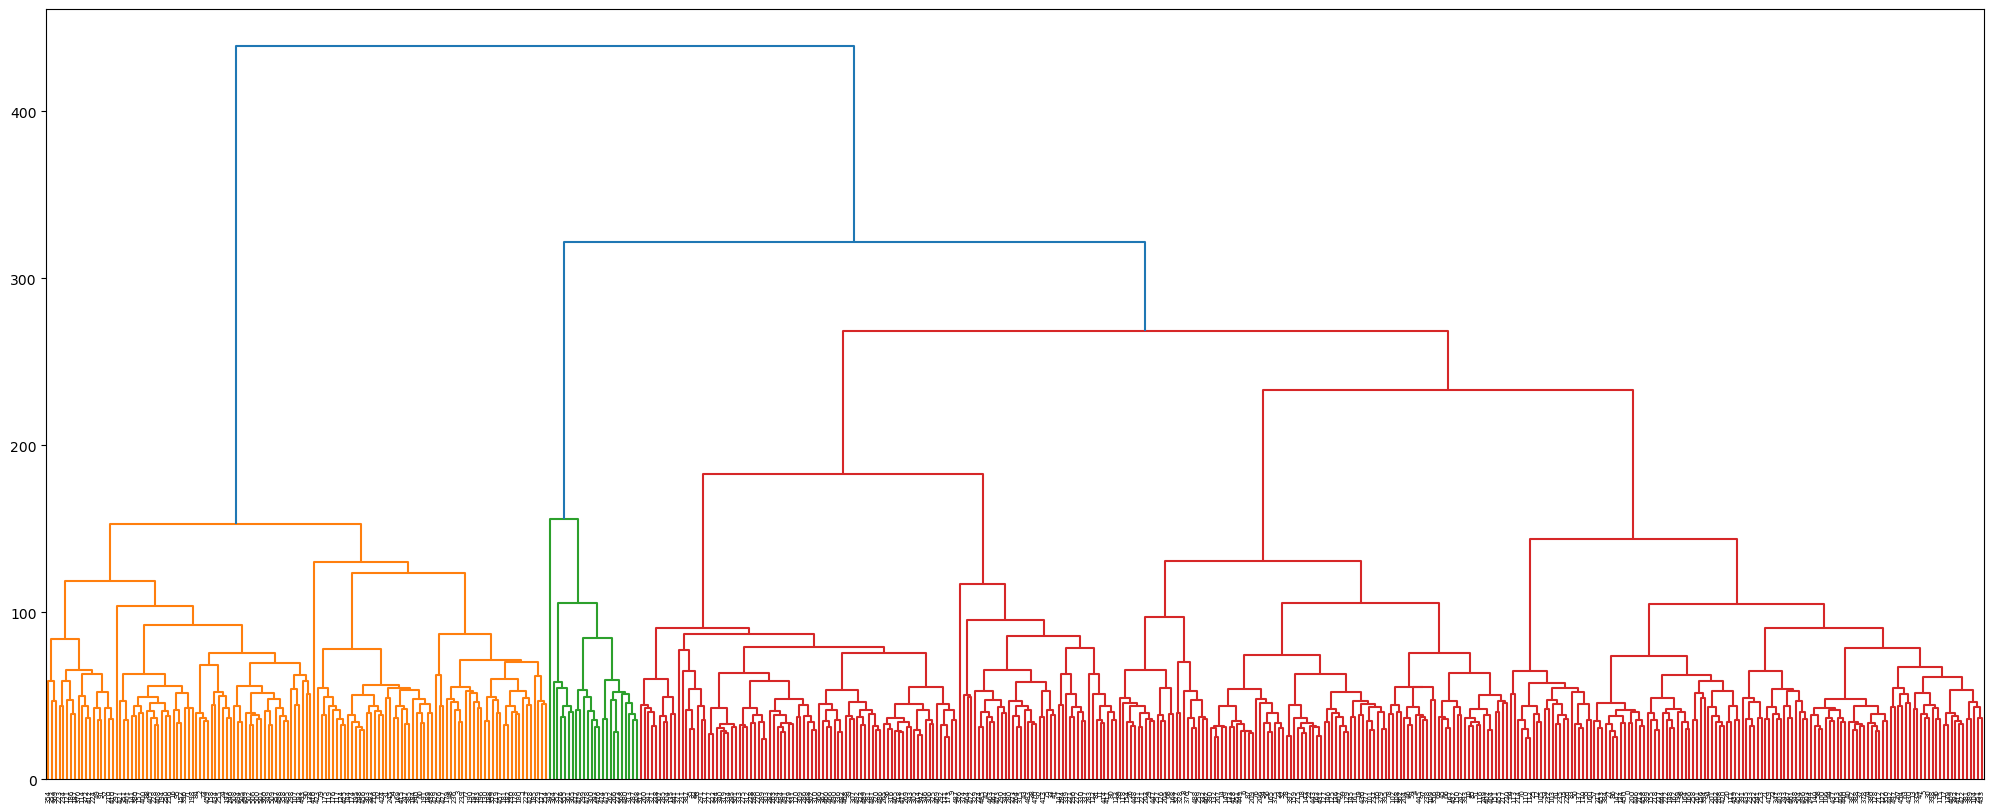

In [55]:
num_data_scaled_df = data_scaled_df.select_dtypes(include='number')
Z = linkage(num_data_scaled_df, method='ward', metric='euclidean')

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

A partir do dendograma anterior, observamos distintamente três agrupamentos correspondentes às classes do atributo target. Notavelmente, não identificamos a presença de amostras em locais inesperados, indicando uma clara separação entre as classes no conjunto de dados

## K-Means

Objetivo: agrupar um conjunto de dados em k clusters distintos

In [56]:

k=3 #sao 3 tipos de cancro, logo 3 clusters distintos 
kmeans_ctd = KMeans(n_clusters=k, max_iter=1000)
kmeans_ctd.fit(num_data_scaled_df.values)
labels = kmeans_ctd.labels_
centroides = kmeans_ctd.cluster_centers_

pd.crosstab(labels,meta_parte['Cancer Type Detailed'], rownames=['clusters'] )


C:\Users\marti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\marti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cancer Type Detailed  Colon Adenocarcinoma  \
clusters                                     
0                                       92   
1                                       19   
2                                      213   

Cancer Type Detailed  Mucinous Adenocarcinoma of the Colon and Rectum  \
clusters                                                                
0                                                                  21   
1                                                                   0   
2                                                                  30   

Cancer Type Detailed  Rectal Adenocarcinoma  
clusters                                     
0                                        75  
1                                         2  
2                                        58

Através desta tabela, podemos inferir que:
- Para o cluster 0, verifica-se a existência de um maior número de amostras (92) no Colon Adenocarcinoma, seguindo 75 no Rectal Adenocarcinoma;
- Para o cluster 1, houve um domínio (correspondendo a 19 amostras) para o Colon Adenocarcinoma;
- Para o cluster 2, verifica-se a prevalência para o Colon Adenocarcinoma de um número de amostras de 213. 

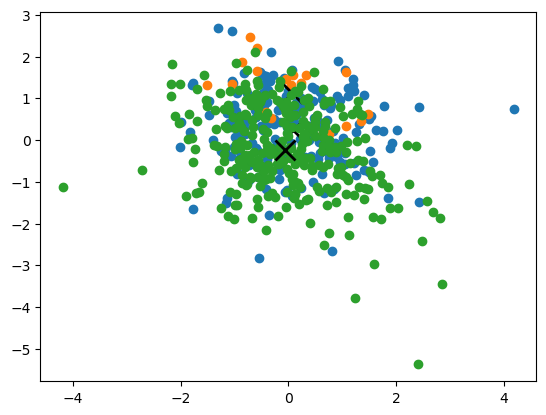

In [57]:
#plot dos clusters e centroides

for i in range(k):
    ds = num_data_scaled_df.values[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1],'o')
    lines = plt.plot(centroides[i,0],centroides[i,1],'kx')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.show()

Podemos comprovar graficamente através do plt, as conclusões referidas anteriormente.

## PCA

Objetivo: redução de dimensionalidade em conjuntos de dados, encontrando os componentes principais que explicam a maior parte da variabilidade nos dados.

C:\Users\marti\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


50
[0.20384626 0.10597325 0.08383841 0.05312895 0.03983019 0.02770877
 0.02434239 0.01839003 0.0163954  0.01301002 0.01208789 0.01123522
 0.01072818 0.00996793 0.00904303 0.00862703 0.00813324 0.00771434
 0.00735391 0.00704909 0.00643008 0.00627978 0.00599767 0.0057952
 0.00546796 0.00523351 0.00499605 0.00476048 0.0046978  0.00462868
 0.00429516 0.00411177 0.00396881 0.00387297 0.00362094 0.00358666
 0.00351167 0.00344327 0.00340092 0.00319177 0.00309081 0.00305419
 0.00301071 0.00295118 0.00283393 0.00276044 0.00269649 0.00266836
 0.00251547 0.00248485]
0.7977611251339956


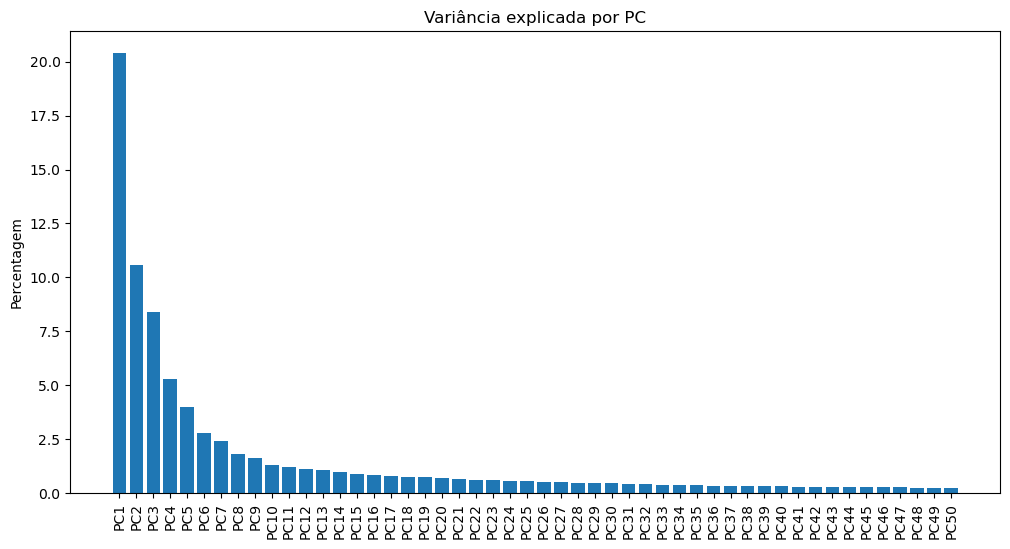

In [58]:
n=50
pca_crc = PCA(n_components=n)
pca_crc.fit(num_data_scaled_df.values)
x_reduzido = pca_crc.transform(num_data_scaled_df)
print(x_reduzido.shape[1])

print(pca_crc.explained_variance_ratio_)
print(sum(pca_crc.explained_variance_ratio_))  
plt.figure(figsize=(12, 6))
plt.bar(range(n), pca_crc.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)],rotation=90)
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")

plt.show()


Através da análise, 50 componentes explicam 80% da variabilidade. Tal como se pode visualizar no gráfico acima, nenhum componente apresenta valores de percentagem significantes para se proceder a uma redução de dimensionalidade.

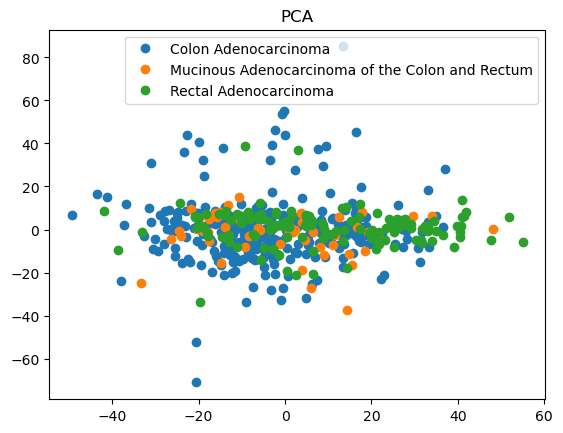

In [59]:
# PC1 and PC2 only (plot)
# first we need to create a numeric index
meta_parte_index = meta_parte.reset_index()

for cancer in meta_parte['Cancer Type Detailed'].unique():
    sp = meta_parte_index.index[meta_parte['Cancer Type Detailed']==cancer]-1
    plt.plot(x_reduzido[sp,0],x_reduzido[sp,1], 'o' , label=cancer)
plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()

Para ver de uma forma mais precisa os genes que explicam grande parte da variância do dataframe

In [60]:
ResultadosPC = []
for i in range(pca_crc.n_components_):
    ResultadosPC.append('PC'+str(i+1)) 

Resultados = pd.DataFrame(pca_crc.components_.transpose(),columns=ResultadosPC,index=num_data_scaled_df.columns)

Resultados.iloc[:,:5].head()


PC1       PC2       PC3       PC4       PC5
Hugo_Symbol                                                  
POLE4        0.007275 -0.017936  0.037277  0.032001  0.001573
POLE         0.014930  0.044198 -0.022155 -0.024935  0.031008
POLR1E       0.017340 -0.013454 -0.014359  0.028488  0.020827
PNN          0.014035 -0.008228 -0.069333 -0.006046  0.025036
POLR2J4      0.017807  0.023727 -0.001860  0.043266 -0.052500

In [61]:
Resultados["PC1"].abs().sort_values(ascending = False).head()

Hugo_Symbol
CSF2RB    0.051760
CD53      0.051440
TLR8      0.051039
CYBB      0.050977
MPEG1     0.050887
Name: PC1, dtype: float64

In [62]:
#Filtrar os genes
filtrar_genes = []
for i in range(pca_crc.n_components_):
    filtrar_genes += Resultados.abs().index[Resultados.abs().iloc[:,i] == Resultados.abs().iloc[:,i].max()].tolist()
print(filtrar_genes)
print(len(filtrar_genes))

['CSF2RB', 'NDUFA5', 'BOD1L', 'DRAP1', 'DHRS12', 'PDXDC2', 'GATC', 'CEACAM7', 'RNF41', 'MMP10', 'MLX', 'TADA3', 'WDR5', 'TSPAN17', 'TRIM26', 'TM4SF4', 'GEMIN8', 'EVPL', 'MPZL1', 'C15orf52', 'UBAP2L', 'OSR2', 'CCDC48', 'C6orf132', 'HOXD1', 'GAS8', 'SCMH1', 'ASMTL', 'RPS17', 'SCMH1', 'LETMD1', 'HOXD9', 'DRAP1', 'ZNF814', 'C1orf126', 'GMEB1', 'QDPR', 'C6orf132', 'ERLIN1', 'DSTN', 'C17orf44', 'TFPT', 'REEP6', 'LLGL1', 'FUT10', 'CD163L1', 'ELAVL1', 'KRI1', 'C12orf49', 'UTP3']
50


Através da observação do gráfico do PCA, nao conseguimos ter uma boa representação da variância do dataset. Assim, optamos por ordenar os genes de acordo com a sua variância. 

In [63]:
df_join=data_scaled_df.join(meta_parte)
columns_to_drop = ['Fraction Genome Altered','Diagnosis Age','Aneuploidy Score','Mutation Count','Overall Survival Status']
df_join = df_join.drop(columns_to_drop, axis=1)

index_list = ['Cancer Type Detailed']+ filtrar_genes  

df_join = df_join.loc[:,~df_join.columns.duplicated()] #remove colunas duplicadas
df_join = df_join.reindex(index_list, axis=1)
display(df_join)

Cancer Type Detailed    CSF2RB  \
TCGA-3L-AA1B-01                             Colon Adenocarcinoma  0.254363   
TCGA-4N-A93T-01                             Colon Adenocarcinoma -1.153281   
TCGA-4T-AA8H-01  Mucinous Adenocarcinoma of the Colon and Rectum -1.124312   
TCGA-5M-AAT4-01                             Colon Adenocarcinoma -1.667681   
TCGA-5M-AAT6-01                             Colon Adenocarcinoma  0.771886   
...                                                          ...       ...   
TCGA-AG-A020-01                            Rectal Adenocarcinoma -1.306708   
TCGA-AG-A026-01                            Rectal Adenocarcinoma -0.882531   
TCGA-AG-A02N-01                            Rectal Adenocarcinoma -0.335350   
TCGA-AG-A02X-01                            Rectal Adenocarcinoma -1.207137   
TCGA-AG-A032-01                            Rectal Adenocarcinoma -0.182692   

                   NDUFA5     BOD1L     DRAP1    DHRS12    PDXDC2      GATC  \
TCGA-3L-AA1B-01  0.041911  1.355995 -0.752174  0.874232  1.492380  0.327195   
TCGA-4N-A93T-01  0.248111 -1.261056  1.424557  2.550715  2.520336 -1.975082   
TCGA-4T-AA8H-01  0.200928  0.386362 -0.527367  1.107490  1.112342 -1.090322   
TCGA-5M-AAT4-01 -0.205201  0.718011  0.340051  0.179006 -0.037561 -0.197711   
TCGA-5M-AAT6-01 -0.662935 -0.420483  0.780337 -1.069931 -0.594100 -0.916590   
...                   ...       ...       ...       ...       ...       ...   
TCGA-AG-A020-01 -0.121290  0.237781 -2.186526 -1.455860  0.912731  0.090273   
TCGA-AG-A026-01 -0.467857  0.463405 -0.454191  0.232510  0.202500 -0.186227   
TCGA-AG-A02N-01  0.011299  0.381603 -2.660412 -1.025683  1.370458 -1.218672   
TCGA-AG-A02X-01 -0.031586 -0.748354 -1.436449 -1.050114  1.173367 -0.181366   
TCGA-AG-A032-01  0.260328  0.245044  0.678690  1.338025  1.351441 -0.716327   

                  CEACAM7     RNF41  ...  C17orf44      TFPT     REEP6  \
TCGA-3L-AA1B-01 -1.065387  0.680549  ... -0.559611  0.826888 -0.549958   
TCGA-4N-A93T-01  1.498817 -1.090727  ... -0.156008  0.661310 -0.559093   
TCGA-4T-AA8H-01  1.307213 -0.684205  ...  1.450236 -0.297092  0.933443   
TCGA-5M-AAT4-01  0.731768 -0.294988  ... -1.314081  0.110237 -0.100191   
TCGA-5M-AAT6-01 -3.039684 -0.277045  ... -0.121157  0.158134 -1.298793   
...                   ...       ...  ...       ...       ...       ...   
TCGA-AG-A020-01 -0.228794  0.038603  ... -0.249726 -0.210826 -0.201504   
TCGA-AG-A026-01 -1.271862 -0.184971  ...  0.729535  0.522814  0.686064   
TCGA-AG-A02N-01  0.390599  1.396788  ...  0.854605 -1.394739  0.399391   
TCGA-AG-A02X-01 -0.867277  0.262589  ... -2.331950 -0.326496 -0.490650   
TCGA-AG-A032-01  0.768678 -1.369402  ...  0.714037  0.427635  0.165461   

                    LLGL1     FUT10   CD163L1    ELAVL1      KRI1  C12orf49  \
TCGA-3L-AA1B-01 -0.458987  0.561299  0.658589  0.040078  0.546619 -0.232869   
TCGA-4N-A93T-01 -1.313200 -1.141955  0.233695  0.443646  0.730627 -1.346218   
TCGA-4T-AA8H-01 -0.173280  1.016064  0.313541 -0.024026  0.952324  0.237959   
TCGA-5M-AAT4-01 -0.035217  0.127956 -0.825033  1.221802  1.785871 -0.661795   
TCGA-5M-AAT6-01  1.025860 -0.138939  0.524702  0.190623  1.199828 -1.073915   
...                   ...       ...       ...       ...       ...       ...   
TCGA-AG-A020-01  0.499355  0.092717 -0.573583  1.202360 -0.008874  0.055704   
TCGA-AG-A026-01  0.210756  0.106943 -0.529272  1.262295  1.932939  0.050115   
TCGA-AG-A02N-01 -0.501232  1.556538  0.678199  0.830219 -0.052850  0.518784   
TCGA-AG-A02X-01 -0.304830 -1.392538  0.022060  1.008773  1.100167  0.641690   
TCGA-AG-A032-01  0.385936 -0.004529 -0.071249  0.538581  0.404609 -1.117930   

                     UTP3  
TCGA-3L-AA1B-01  1.270207  
TCGA-4N-A93T-01 -0.896538  
TCGA-4T-AA8H-01  0.780272  
TCGA-5M-AAT4-01  0.433201  
TCGA-5M-AAT6-01  0.977155  
...                   ...  
TCGA-AG-A020-01  0.108910  
TCGA-AG-A026-01  0.456372  
TCGA-AG-A02N-01 -0.614711  
TCGA-AG-A02X-01 -4.287436  
TCGA-AG-A032

## Hierarchical clustering

Objetivo: método de agrupamento em que os dados são organizados em uma estrutura de árvore (dendrograma), para identificar padrões de similaridade.

In [64]:
hclust = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="complete")
hclust.fit(data_scaled_df) 

# Elaboração de uma tabela cruzada entre o tempo e o clustering
res_hc = hclust.labels_
pd.crosstab (meta_parte["Cancer Type Detailed"], res_hc)

col_0                                              0   1  2
Cancer Type Detailed                                       
Colon Adenocarcinoma                             234  89  1
Mucinous Adenocarcinoma of the Colon and Rectum   33  18  0
Rectal Adenocarcinoma                            121  14  0

Pode-se observar que os adenocarcinomas do cólon (Colon Adenocarcinoma e Mucinous Adenocarcinoma of the Colon and Rectum) tendem a agrupar-se mais próximos entre si em comparação com o Adenocarcinoma retal.

Colon Adenocarcinoma é o tipo de cancro mais prevalente: Com uma contagem mais alta em todos os grupos (0, 1, 2), Colon Adenocarcinoma parece ser o tipo de cancro mais comum nesta amostra.

Rectal Adenocarcinoma tem uma presença considerável no Grupo 0: A contagem de Rectal Adenocarcinoma é relativamente alta no Grupo 0 em comparação com os outros grupos.

Mucinous Adenocarcinoma tem uma presença significativa no Grupo 1: Similarmente, Mucinous Adenocarcinoma mostra uma contagem mais alta no Grupo 1 em comparação com os outros grupos.

## Secção 3

In [91]:
from sklearn.metrics import ConfusionMatrixDisplay , precision_score, recall_score
from sklearn import *
from sklearn import tree 
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score

Dividiu-se o dataframe em treino e teste, usando percentage slit (30% para teste e 70% para treino) e cross validation e comparou-se, por fim, os desempenhos, atavés das métricas de avaliação.

Modelos utilizados:
- Decision Tree
- SVM 
- Gradient Boosting Classifier
- K-Neighbour 

Métricas de avaliação:
- Accuracy
- Precisão
- Sensibilidade

# Supervised Machine Learning

**target variable**: 'Cancer Type Detailed'

#### Percentage split

Começámos por dividir o dataframe através do método de percentage split, 30% para teste e 70% para treino.

In [92]:
target = meta_parte['Cancer Type Detailed']

In [93]:
train_in, test_in, train_out, test_out = train_test_split(data_scaled_df, target, test_size=1/3, random_state=1)
print(train_in.shape)
print(test_in.shape)

(340, 1572)
(170, 1572)


### Decision Tree


Funciona com a construção de uma árvore de decisões durante o treino, onde cada nó representa uma decisão baseada nas características dos dados, permitindo prever resultados ao seguir os ramos até as folhas da árvore.

In [94]:

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(train_in, train_out)
preds_tree = tree_model.predict(test_in)

print("Previsões corretas (%): ", (preds_tree == test_out).sum()/len(preds_tree))


Previsões corretas (%):  0.47058823529411764


Fez-se de seguida, a matriz de confusão respetiva para a Decision Tree. Esta é uma ilustração mais fácil dos resultados que foram previstos correta e incorretamente.

Posteriormente, a partir destes resultados é feito o cálculo da Precisão e Sensibilidade.

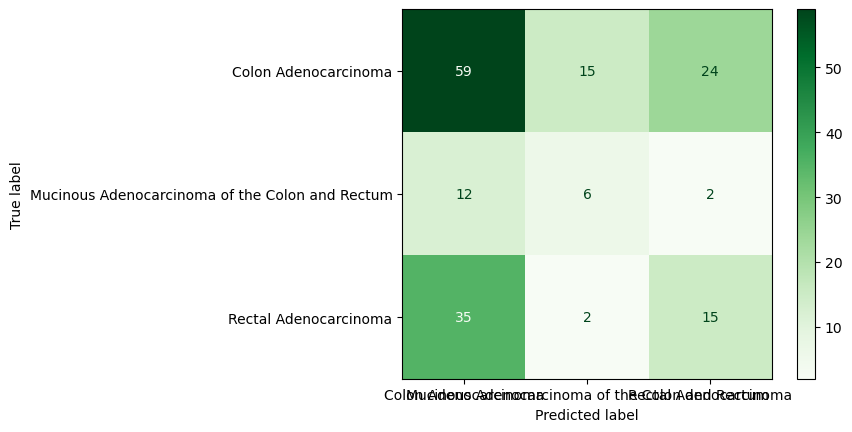

In [95]:
tree_cm = ConfusionMatrixDisplay.from_predictions(test_out, preds_tree, display_labels=tree_model.classes_, cmap='Greens')
tree_cm

In [96]:
print('Precisão: %0.2f' % precision_score(test_out,preds_tree, average='weighted'))
print('Sensibilidade: %0.2f' % recall_score(test_out,preds_tree, average='weighted'))

Precisão: 0.46
Sensibilidade: 0.47


## SVM

Encontra uma linha de separação, mais comumente chamada de hiperplano entre dados de duas classes, maximizando a distância entre os pontos mais próximos de cada classe.

In [70]:
svm_model = svm.SVC(gamma=0.001, C=100.)

svm_model = svm_model.fit(train_in, train_out)

pred_svm = svm_model.predict(test_in)
print(svm_model)

print("Accuracy:", accuracy_score(test_out,pred_svm))

SVC(C=100.0, gamma=0.001)
Accuracy: 0.6176470588235294


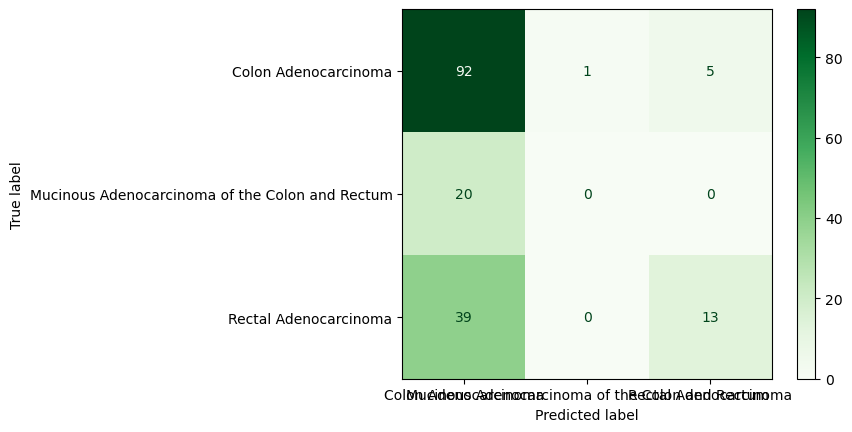

In [71]:
tree_cm = ConfusionMatrixDisplay.from_predictions(test_out, pred_svm, display_labels=svm_model.classes_,  cmap='Greens')
tree_cm

In [72]:
print('Precisão: %0.2f' % precision_score(test_out,pred_svm, average='weighted'))
print('Sensibilidade: %0.2f' % recall_score(test_out,pred_svm, average='weighted'))

Precisão: 0.57
Sensibilidade: 0.62


## Gradient Boosting Classifier

Combina sequencialmente modelos mais simples, ajustando-os para corrigir erros anteriores, guiado por um gradiente descendente para minimizar uma função de perda. O modelo inicial, geralmente uma árvore de decisão rasa, é melhorado por modelos subsequentes, chamados de 'árvores fracas'.

In [73]:
GBc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
GBc.fit(train_in, train_out)

preds = GBc.predict(test_in)
print("% valores corretamente previstos: ",accuracy_score(test_out,preds)*100,"%")

% valores corretamente previstos:  59.411764705882355 %


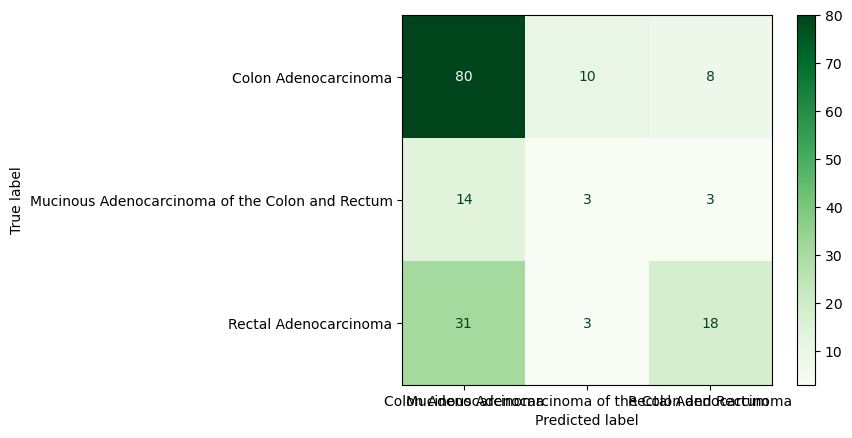

In [74]:
tree_cm = ConfusionMatrixDisplay.from_predictions(test_out, preds, display_labels=GBc.classes_,  cmap='Greens')
tree_cm

In [75]:
print('Precisão: %0.2f' % precision_score(test_out,preds, average='weighted'))
print('Sensibilidade: %0.2f' % recall_score(test_out,preds, average='weighted'))

Precisão: 0.58
Sensibilidade: 0.59


## KNN

Classifica uma instância de teste com base na classe ou na média dos valores das k instâncias (a escolha deste valor é importante) mais próximas no espaço de características.

In [76]:

train_in_np = np.array(train_in)
test_in_np = np.array(test_in)
train_out_np = np.array(train_out)
test_out_np = np.array(test_out)

# Crie uma instância do KNeighborsClassifier
knn = KNeighborsClassifier()

# Treine o modelo com os dados de treinamento
knn.fit(train_in_np, train_out_np)

# Faça previsões nos dados de teste
preds = knn.predict(test_in_np)

print("Previsões corretas (%): ", (preds == test_out).sum() / len(preds))


Previsões corretas (%):  0.6647058823529411


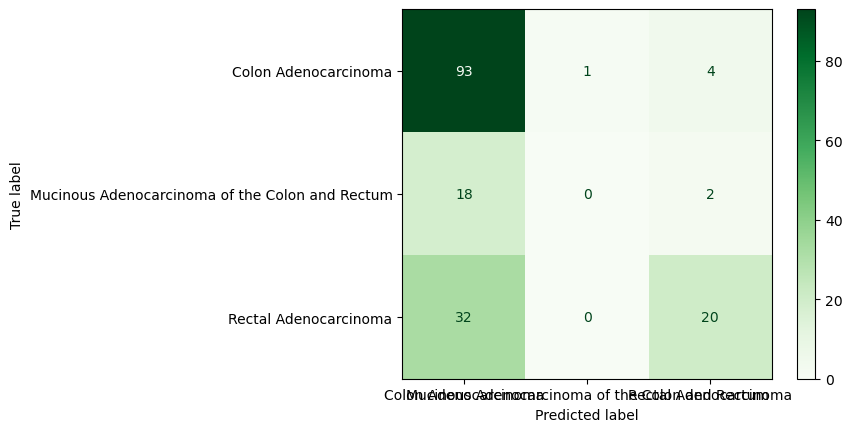

In [77]:
tree_cm = ConfusionMatrixDisplay.from_predictions(test_out_np, preds, display_labels=knn.classes_,  cmap='Greens')
tree_cm

In [78]:
print('Precisão: %0.2f' % precision_score(test_out_np,preds, average='weighted'))
print('Sensibilidade: %0.2f' % recall_score(test_out_np,preds, average='weighted'))

Precisão: 0.61
Sensibilidade: 0.66


## Cross validation

Faz-se o particionamento do conjunto de dados em subconjuntos mutuamente exclusivos, e posteriormente, o uso de alguns destes subconjuntos para a estimação dos parâmetros do modelo (dados de treinamento), sendo os subconjuntos restantes (dados de validação ou de teste) empregados na validação do modelo.

## Decision Tree

In [80]:
scores_svm_cv = cross_val_score(estimator=tree_model, X=data_scaled_df, y=target, cv=5)

print("Modelo Decision Tree com Cross-Validation")
print('Accuracy values:', scores_svm_cv)
print('Mean accuracy: %0.2f' % scores_svm_cv.mean())

Modelo Decision Tree com Cross-Validation
Accuracy values: [0.55882353 0.46078431 0.47058824 0.47058824 0.57843137]
Mean accuracy: 0.51


## SVM

In [81]:
scores = cross_val_score(svm_model, X=data_scaled_df, y=target, cv = 8)

print("Modelo SVM com Cross-Validation")
print('Accuracy values:', scores)
print('Mean accuracy: %0.2f' % scores.mean())


Modelo SVM com Cross-Validation
Accuracy values: [0.671875   0.640625   0.578125   0.625      0.640625   0.671875
 0.65079365 0.68253968]
Mean accuracy: 0.65


## Gradient Boosting Classifier

In [82]:
scores_gnb = cross_val_score(GBc, X=data_scaled_df, y=target, cv = 5)

print("Modelo Gradient Boosting Classifier com Cross-Validation")
print('Accuracy values:', scores_gnb)
print('Mean accuracy: %0.2f' % scores_gnb.mean())

Modelo Gradient Boosting Classifier com Cross-Validation
Accuracy values: [0.56862745 0.50980392 0.62745098 0.48039216 0.61764706]
Mean accuracy: 0.56


### KNN

In [110]:
from sklearn.neighbors import KNeighborsClassifier

scores_knn = cross_val_score(knn, data_scaled_df, y=target, cv = 5)

print(scores_knn)
print(scores_knn.mean())

[nan nan nan nan nan]
nan


### Comparação dos resultados

Por fim, comparou-se as métricas de avaliação dos vários casos.

Verifica-se ligeiramente que se obtém um melhor desempenho com a técnica cross-validation.

Ademais, a melhor previsão foi KNN com Percentage Split, não podendo ser, no entanto, considerada um bom modelo de previsão, dado o valor relativamente baixo (accuracy=0,66).

Uma limitação ao desempenho dos modelos é o desbalanceamento do dataset.

Por fim, é notório que os resultados não foram muito satisfatórios.
